## 1. K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* e: 추정치, p: 잠정치, -: 자료없음, ...: 미상자료, x: 비밀보호, ▽: 시계열 불연(단위: 백만원)

#### 1-1.데이터 자료
* KOSIS(국가통계포털) https://kosis.kr/index/index.do
* 지역별 / 상품군별 온라인쇼핑 해외직접판매액   수록기간분기,년 2014 1/4~2024 2/4통계표직접다운로드
* 2014년 1분기 ~ 2019년 4분기까지 데이터

## 2. 필요 라이브러리 가져오기

In [585]:
import pandas as pd
import seaborn as sns    # 시각화
import matplotlib.pyplot as plt


%matplotlib inline

In [587]:
# os별 폰트설정
import os

if os.name == "posix":           # mac
    sns.set(font="AppleGothic")
elif os.name == "nt":            # Windows
    sns.set(font="Malgun Gothic")

In [588]:
# 레티나 설정: 선명한 글씨
%config InlineBackend.figure_format = "retina"

## 3. 데이터 로드하기

In [636]:
df_raw = pd.read_csv("data/지역별_상품군별_온라인쇼핑_해외직접판매액(2014-2019).csv", encoding="cp949")
df_raw

지역별        상품군별   판매유형별            항목   단위  2014.1/4  2014.2/4  2014.3/4  \
0    합계          합계       계  해외직접판매액[백만원]  백만원  148272.0  153641.0  163999.0   
1    합계          합계     면세점  해외직접판매액[백만원]  백만원       NaN       NaN       NaN   
2    합계          합계  면세점 이외  해외직접판매액[백만원]  백만원       NaN       NaN       NaN   
3    합계  컴퓨터 및 주변기기       계  해외직접판매액[백만원]  백만원    4915.0    4052.0    3912.0   
4    합계  컴퓨터 및 주변기기     면세점  해외직접판매액[백만원]  백만원       NaN       NaN       NaN   
..   ..         ...     ...           ...  ...       ...       ...       ...   
964  기타    생활·자동차용품     면세점  해외직접판매액[백만원]  백만원       NaN       NaN       NaN   
965  기타    생활·자동차용품  면세점 이외  해외직접판매액[백만원]  백만원       NaN       NaN       NaN   
966  기타         기 타       계  해외직접판매액[백만원]  백만원     765.0     735.0     849.0   
967  기타         기 타     면세점  해외직접판매액[백만원]  백만원       NaN       NaN       NaN   
968  기타         기 타  면세점 이외  해외직접판매액[백만원]  백만원       NaN       NaN       NaN   

     2014.4/4  2015.1/4  ...  2017.4/4  2018.1/4  2018.2/4  2018.3/4  \
0    213216.0  269101.0  ...    858240    833672    897205    921586   
1         NaN       NaN  ...    677884    665613    725319    761836   
2         NaN       NaN  ...    180356    168059    171886    159750   
3      3529.0    2903.0  ...      2158      5236      3854      4320   
4         NaN       NaN  ...         1         2         6         1   
..        ...       ...  ...       ...       ...       ...       ...   
964       NaN       NaN  ...         0         0         0         0   
965       NaN       NaN  ...       634       665       469       504   
966     804.0     788.0  ...      1101      1067      1063      1120   
967       NaN       NaN  ...       266       272       316       404   
968       NaN       NaN  ...       835       795       747       716   

     2018.4/4  2019.1/4  2019.2/4 2019.3/4 2019.4/4 Unnamed: 29  
0      974060   1251122   1345723  1526135  1881628         NaN  
1      770656   1070693   1157158  1336372  1655635         NaN  
2      203404    180429    188565   189763   225993         NaN  
3        4511      3702      4038     3670     3827         NaN  
4         215         2         0        1       70         NaN  
..        ...       ...       ...      ...      ...         ...  
964         0         0         0        0        0         NaN  
965       589       465       488      308      531         NaN  
966       770       711       689      469     1094         NaN  
967         0         0         1        0        1         NaN  
968       770       711       688      469     1093         NaN  

[969 rows x 30 columns]

In [ ]:
df_raw.shape

In [44]:
# 국가(대륙)별 데이터 빈도수
df_raw["지역별"].value_counts() 

지역별
합계         51
유럽         51
아프리카       51
중남미        51
대양주        51
기타 유럽      51
영국         51
유럽연합       51
유럽연합+영국    51
캐나다        51
아시아        51
미국         51
북미         51
기타 아시아     51
중동         51
아세안        51
일본         51
중국         51
기타         51
Name: count, dtype: int64

In [ ]:
# 미국 데이터만 따로 보기
df_raw[df_raw["지역별"] == "미국"]

## 4. 분석과 시각화를 위한 tidy data 만들기
* pd.melt(df): 컬럼 데이터를 행으로 넣어줌
* 분기 컬럼(20xx.x/4)을 행으로 변경 예정

In [565]:
df_raw.columns

Index(['지역별', '상품군별', '판매유형별', '항목', '단위', '2014.1/4', '2014.2/4', '2014.3/4',
       '2014.4/4', '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4',
       '2016.2/4', '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4',
       '2017.4/4', '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4',
       '2019.2/4', '2019.3/4', '2019.4/4', 'Unnamed: 29'],
      dtype='object')

df_raw.values

In [652]:
df_raw.drop("Unnamed: 29", axis=1)

지역별        상품군별   판매유형별            항목   단위  2014.1/4  2014.2/4  2014.3/4  \
0    합계          합계       계  해외직접판매액[백만원]  백만원  148272.0  153641.0  163999.0   
1    합계          합계     면세점  해외직접판매액[백만원]  백만원       NaN       NaN       NaN   
2    합계          합계  면세점 이외  해외직접판매액[백만원]  백만원       NaN       NaN       NaN   
3    합계  컴퓨터 및 주변기기       계  해외직접판매액[백만원]  백만원    4915.0    4052.0    3912.0   
4    합계  컴퓨터 및 주변기기     면세점  해외직접판매액[백만원]  백만원       NaN       NaN       NaN   
..   ..         ...     ...           ...  ...       ...       ...       ...   
964  기타    생활·자동차용품     면세점  해외직접판매액[백만원]  백만원       NaN       NaN       NaN   
965  기타    생활·자동차용품  면세점 이외  해외직접판매액[백만원]  백만원       NaN       NaN       NaN   
966  기타         기 타       계  해외직접판매액[백만원]  백만원     765.0     735.0     849.0   
967  기타         기 타     면세점  해외직접판매액[백만원]  백만원       NaN       NaN       NaN   
968  기타         기 타  면세점 이외  해외직접판매액[백만원]  백만원       NaN       NaN       NaN   

     2014.4/4  2015.1/4  ...  2017.3/4  2017.4/4  2018.1/4  2018.2/4  \
0    213216.0  269101.0  ...    755101    858240    833672    897205   
1         NaN       NaN  ...    610630    677884    665613    725319   
2         NaN       NaN  ...    144471    180356    168059    171886   
3      3529.0    2903.0  ...      2032      2158      5236      3854   
4         NaN       NaN  ...         5         1         2         6   
..        ...       ...  ...       ...       ...       ...       ...   
964       NaN       NaN  ...         0         0         0         0   
965       NaN       NaN  ...       581       634       665       469   
966     804.0     788.0  ...       816      1101      1067      1063   
967       NaN       NaN  ...        82       266       272       316   
968       NaN       NaN  ...       734       835       795       747   

     2018.3/4  2018.4/4  2019.1/4 2019.2/4 2019.3/4 2019.4/4  
0      921586    974060   1251122  1345723  1526135  1881628  
1      761836    770656   1070693  1157158  1336372  1655635  
2      159750    203404    180429   188565   189763   225993  
3        4320      4511      3702     4038     3670     3827  
4           1       215         2        0        1       70  
..        ...       ...       ...      ...      ...      ...  
964         0         0         0        0        0        0  
965       504       589       465      488      308      531  
966      1120       770       711      689      469     1094  
967       404         0         0        1        0        1  
968       716       770       711      688      469     1093  

[969 rows x 29 columns]

#### * 분기 컬럼 행으로 바꾸기

In [772]:
# id_vars: 기준 컬럼 지정
# id_vars에 지정하지 않은 컬럼은 자동으로 value_vars(values)에 지정됨
# var_name: value_vars(variable)컬럼명 지정
# value_name: value컬럼명 지정

df = df_raw.melt(id_vars=["지역별", "상품군별", "판매유형별", "항목", "단위"], 
                 var_name="기간", value_name="백만원")
df.shape

(24225, 7)

In [782]:
df.head()

지역별        상품군별   판매유형별            항목   단위        기간       백만원
0  합계          합계       계  해외직접판매액[백만원]  백만원  2014 1/4  148272.0
1  합계          합계     면세점  해외직접판매액[백만원]  백만원  2014 1/4       NaN
2  합계          합계  면세점 이외  해외직접판매액[백만원]  백만원  2014 1/4       NaN
3  합계  컴퓨터 및 주변기기       계  해외직접판매액[백만원]  백만원  2014 1/4    4915.0
4  합계  컴퓨터 및 주변기기     면세점  해외직접판매액[백만원]  백만원  2014 1/4       NaN

In [783]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24225 entries, 0 to 24224
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역별     24225 non-null  object
 1   상품군별    24225 non-null  object
 2   판매유형별   24225 non-null  object
 3   항목      24225 non-null  object
 4   단위      24225 non-null  object
 5   기간      23256 non-null  object
 6   백만원     13428 non-null  object
dtypes: object(7)
memory usage: 1.3+ MB


## 5. 데이터 전처리

### 5.1 기간에서 연도를 분리하기

In [728]:
# 분기 데이터타입 str -> int로 변경
print(type("2019 4/4 p".split()[0]))
int("2019 4/4 p".split()[0])

<class 'str'>


2019

In [105]:
# map 사용법 출력
map?

Init signature: map(self, /, *args, **kwargs)
Docstring:     
map(func, *iterables) --> map object

Make an iterator that computes the function using arguments from
each of the iterables.  Stops when the shortest iterable is exhausted.
Type:           type
Subclasses:     

In [776]:
# 분기 데이터타입 변경 시 .은 float으로 인식되어 str -> int형 변환 불가
# 분기 2014.1/4에 점 제거
df["기간"] = df["기간"].map(lambda x : x.replace(".", " "))
df["기간"]

0           2014 1/4
1           2014 1/4
2           2014 1/4
3           2014 1/4
4           2014 1/4
            ...     
24220    Unnamed: 29
24221    Unnamed: 29
24222    Unnamed: 29
24223    Unnamed: 29
24224    Unnamed: 29
Name: 기간, Length: 24225, dtype: object

In [778]:
# 기간 컬럼에 Unnamed: 29를 다른 값으로 변경
df["기간"] = df["기간"].replace("Unnamed: 29", np.nan)
df["기간"]

0        2014 1/4
1        2014 1/4
2        2014 1/4
3        2014 1/4
4        2014 1/4
           ...   
24220         NaN
24221         NaN
24222         NaN
24223         NaN
24224         NaN
Name: 기간, Length: 24225, dtype: object

In [780]:
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df.head()

AttributeError: 'float' object has no attribute 'split'

In [224]:
"2019 1/4 p".split()[1].split("/")[0]

'1'

In [228]:
# 기간에서 분기만 분리하기
df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split("/")[0]))
df.head()

지역별        상품군별   판매유형별            항목   단위        기간       백만원  분기
0  합계          합계       계  해외직접판매액[백만원]  백만원  2014 1/4  148272.0   1
1  합계          합계     면세점  해외직접판매액[백만원]  백만원  2014 1/4       NaN   1
2  합계          합계  면세점 이외  해외직접판매액[백만원]  백만원  2014 1/4       NaN   1
3  합계  컴퓨터 및 주변기기       계  해외직접판매액[백만원]  백만원  2014 1/4    4915.0   1
4  합계  컴퓨터 및 주변기기     면세점  해외직접판매액[백만원]  백만원  2014 1/4       NaN   1

### 5.2 금액을 수치데이터로 표현하기 위해 데이터타입 변경하기

In [238]:
import numpy as np

In [256]:
# - -> NaN으로 변경
# 문자 -(자료없음)를 결측치로 변경하고 float타입으로 변경하기
# NaN은 float type임

df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)
df.head()

지역별        상품군별   판매유형별            항목   단위        기간       백만원  분기
0  합계          합계       계  해외직접판매액[백만원]  백만원  2014 1/4  148272.0   1
1  합계          합계     면세점  해외직접판매액[백만원]  백만원  2014 1/4       NaN   1
2  합계          합계  면세점 이외  해외직접판매액[백만원]  백만원  2014 1/4       NaN   1
3  합계  컴퓨터 및 주변기기       계  해외직접판매액[백만원]  백만원  2014 1/4    4915.0   1
4  합계  컴퓨터 및 주변기기     면세점  해외직접판매액[백만원]  백만원  2014 1/4       NaN   1

### 5..3 필요없는 데이터 제거하기

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21600 entries, 54 to 24224
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역별     21600 non-null  object 
 1   상품군별    21600 non-null  object 
 2   판매유형별   21600 non-null  object 
 3   항목      21600 non-null  object 
 4   단위      21600 non-null  object 
 5   기간      21600 non-null  object 
 6   백만원     6048 non-null   float64
 7   분기      21600 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.5+ MB


In [283]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거
df = df[(df["지역별"] != "합계") & (df["상품군별"] != "합계")].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21600 entries, 54 to 24224
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역별     21600 non-null  object 
 1   상품군별    21600 non-null  object 
 2   판매유형별   21600 non-null  object 
 3   항목      21600 non-null  object 
 4   단위      21600 non-null  object 
 5   기간      21600 non-null  object 
 6   백만원     6048 non-null   float64
 7   분기      21600 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.5+ MB


In [287]:
# 결측치 확인
df.isnull().sum()

지역별          0
상품군별         0
판매유형별        0
항목           0
단위           0
기간           0
백만원      15552
분기           0
dtype: int64

## 6. K-Beauty 시각화

### 6.1 전체 상품군 판매액

In [328]:
# 판매유형별 == "계" 데이터를 통해 평균 값을 구하기
# 판매유형별 데이터 : 일부 기간에는 "계"만 존재. 이 데이터만 가져와야함
df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

지역별        상품군별 판매유형별            항목   단위        기간  백만원  분기
54  아시아  컴퓨터 및 주변기기     계  해외직접판매액[백만원]  백만원  2014 1/4  NaN   1
57  아시아  가전·전자·통신기기     계  해외직접판매액[백만원]  백만원  2014 1/4  NaN   1
60  아시아       가전·전자     계  해외직접판매액[백만원]  백만원  2014 1/4  NaN   1
63  아시아        통신기기     계  해외직접판매액[백만원]  백만원  2014 1/4  NaN   1
66  아시아       소프트웨어     계  해외직접판매액[백만원]  백만원  2014 1/4  NaN   1

<Axes: xlabel='기간', ylabel='백만원'>

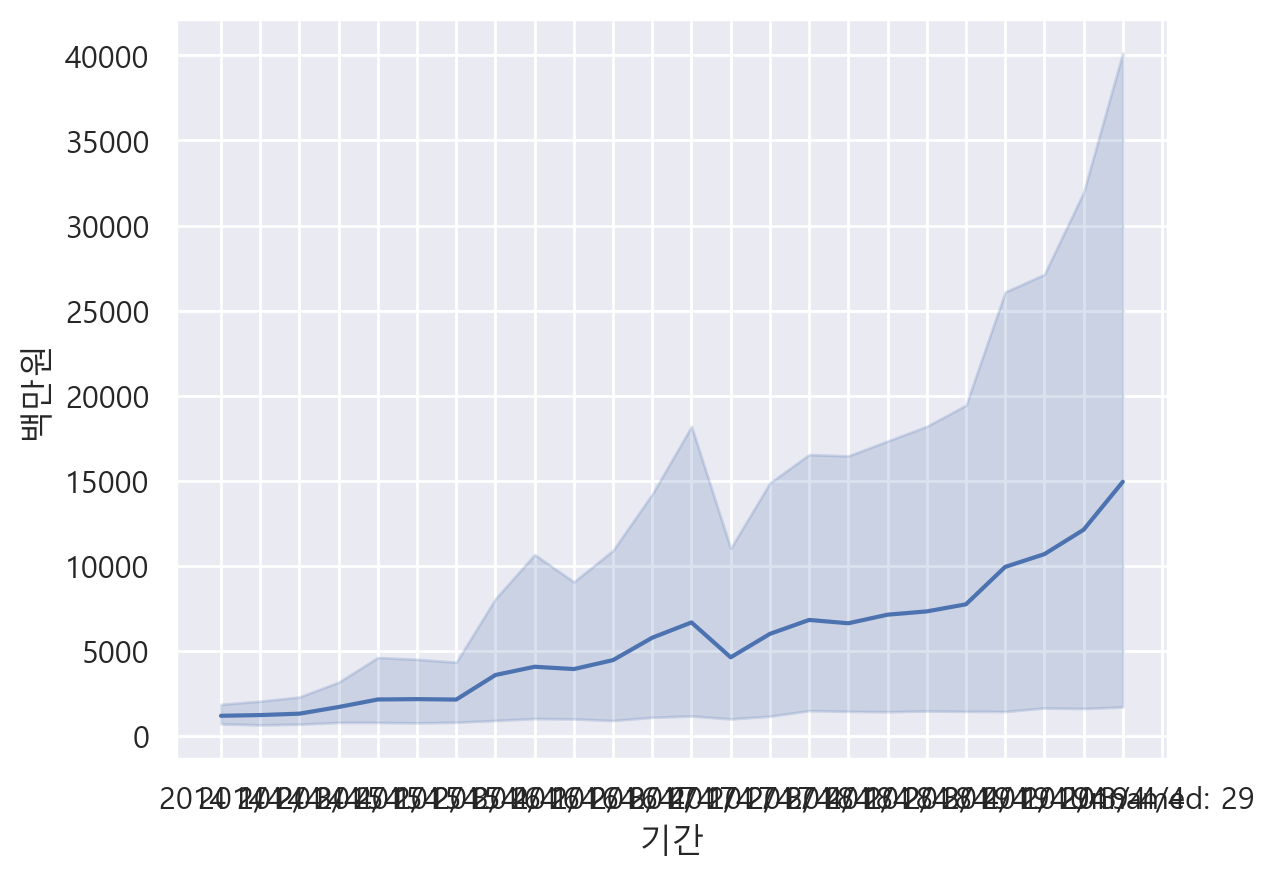

In [330]:
# 연도, 판매액 시각화 - lineplot
sns.lineplot(data=df_total, x="기간", y="백만원")

# 기간->연도

* legend값 그래프 밖에 그리기 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

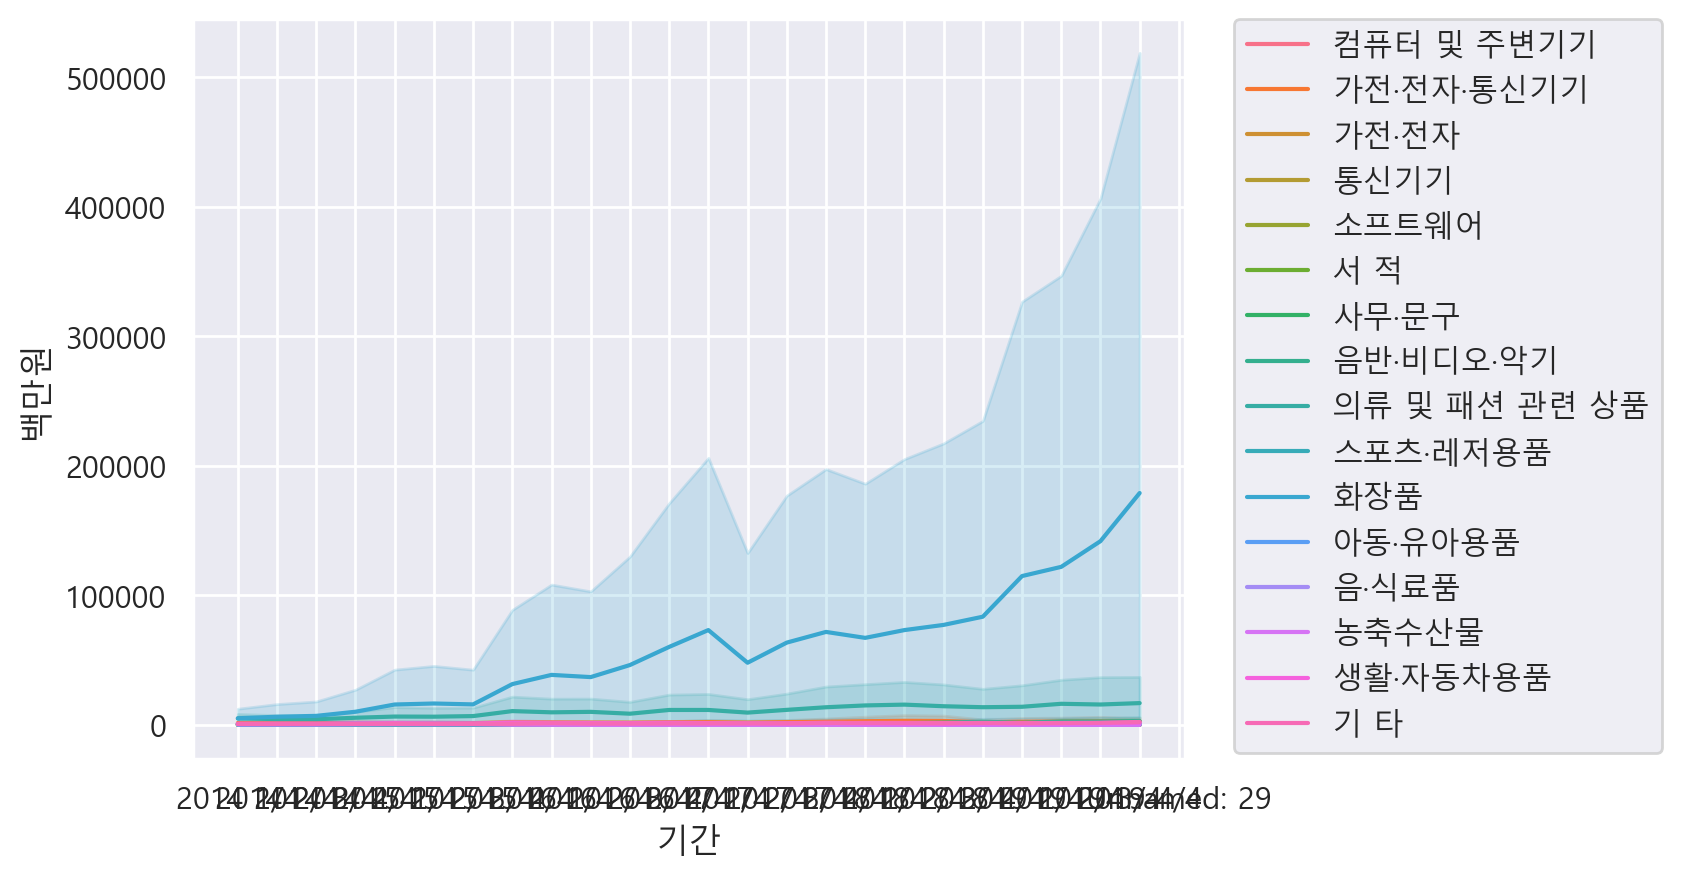

In [351]:
# 연도, 판매액 시각화 - lineplot + 상품군 별 다른 색상으로 표시
sns.lineplot(data=df_total, x="기간", y="백만원", hue="상품군별")
# lengd값 그래프 밖에 그리기
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 기간->연도

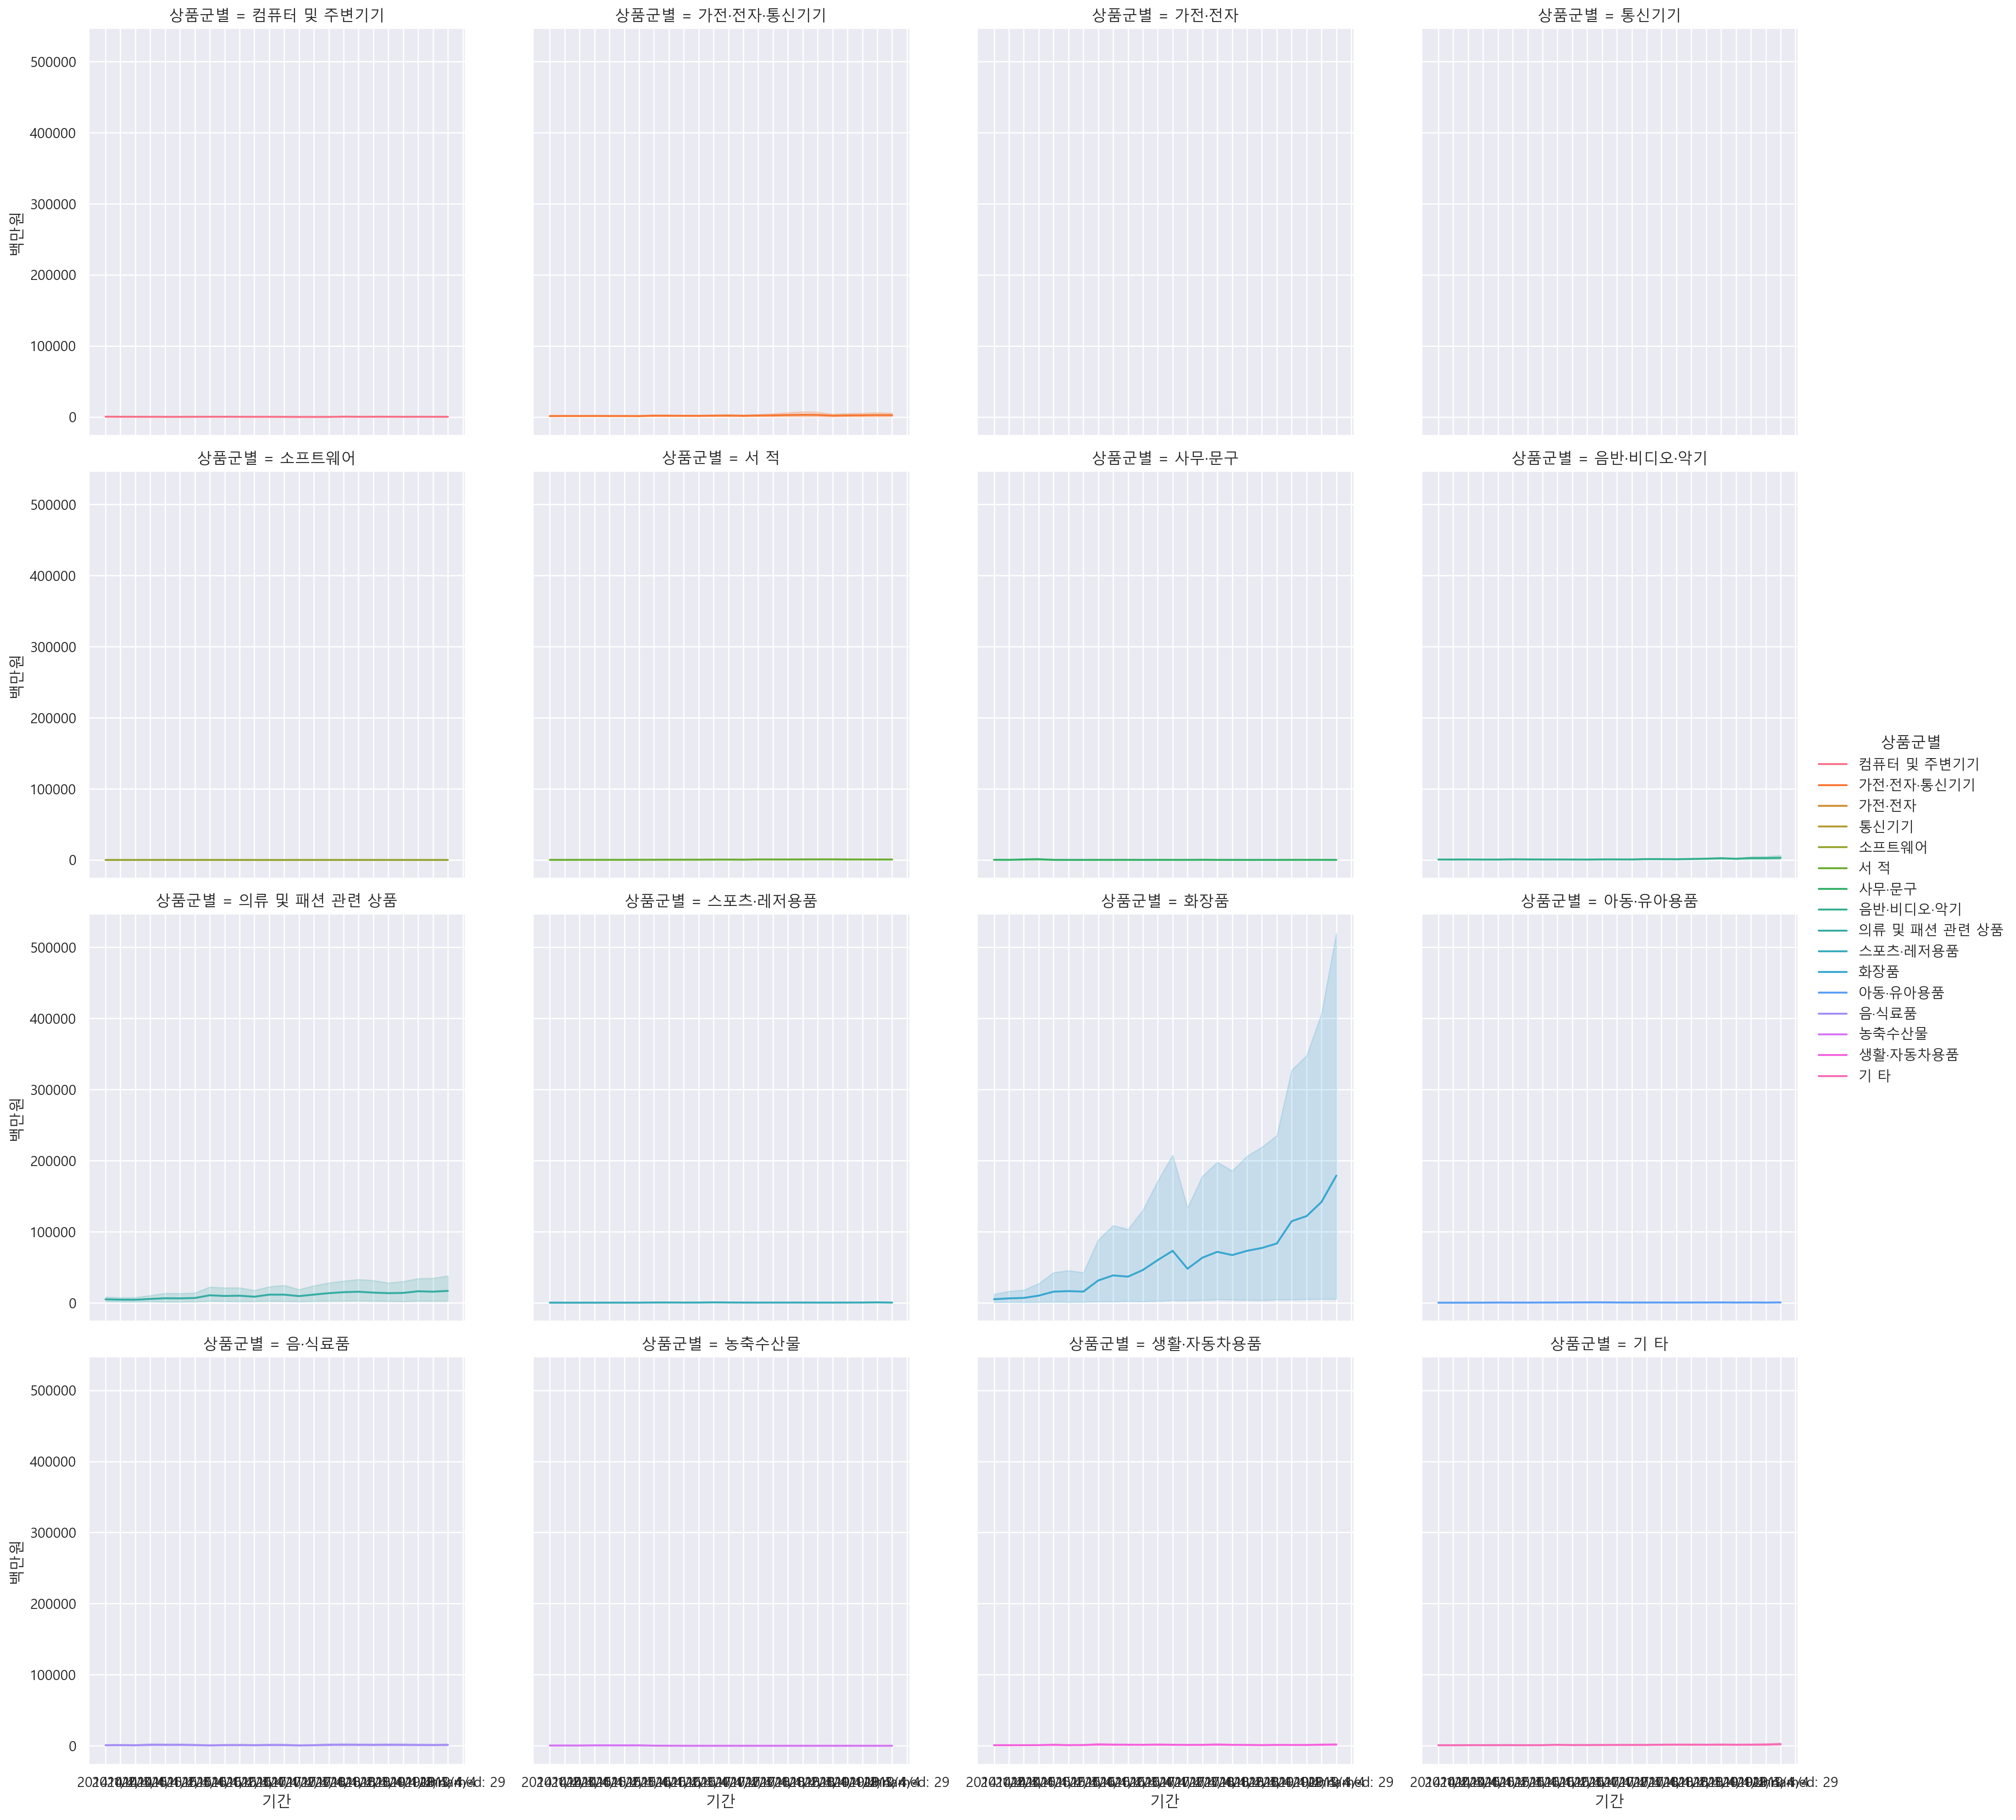

In [361]:
# 위에 그린 그래프를 서브플롯으로 표시(자세히 보기 위해)
sns.relplot(data=df_total, x="기간", y="백만원", hue="상품군별", 
            kind="line", col="상품군별", col_wrap=4)
# 기간->연도

In [454]:
# 위 서브플롯 중 화장품 결과값이 다른 결과값과 차이가 많아, 다른 결과값이 자세히 안 보임
# 가장 큰 데이터값을 가지는 "상품군별"이 "화장품", "의류 및 패션관련 상품"인 값을 제외하고 출력하기
# isin()
df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션 관련 상품"])].copy()
df_sub

지역별        상품군별 판매유형별            항목   단위           기간  백만원  분기
54     아시아  컴퓨터 및 주변기기     계  해외직접판매액[백만원]  백만원     2014 1/4  NaN   1
57     아시아  가전·전자·통신기기     계  해외직접판매액[백만원]  백만원     2014 1/4  NaN   1
60     아시아       가전·전자     계  해외직접판매액[백만원]  백만원     2014 1/4  NaN   1
63     아시아        통신기기     계  해외직접판매액[백만원]  백만원     2014 1/4  NaN   1
66     아시아       소프트웨어     계  해외직접판매액[백만원]  백만원     2014 1/4  NaN   1
...    ...         ...   ...           ...  ...          ...  ...  ..
24210   기타     아동·유아용품     계  해외직접판매액[백만원]  백만원  Unnamed: 29  NaN  29
24213   기타       음·식료품     계  해외직접판매액[백만원]  백만원  Unnamed: 29  NaN  29
24216   기타       농축수산물     계  해외직접판매액[백만원]  백만원  Unnamed: 29  NaN  29
24219   기타    생활·자동차용품     계  해외직접판매액[백만원]  백만원  Unnamed: 29  NaN  29
24222   기타         기 타     계  해외직접판매액[백만원]  백만원  Unnamed: 29  NaN  29

[6300 rows x 8 columns]

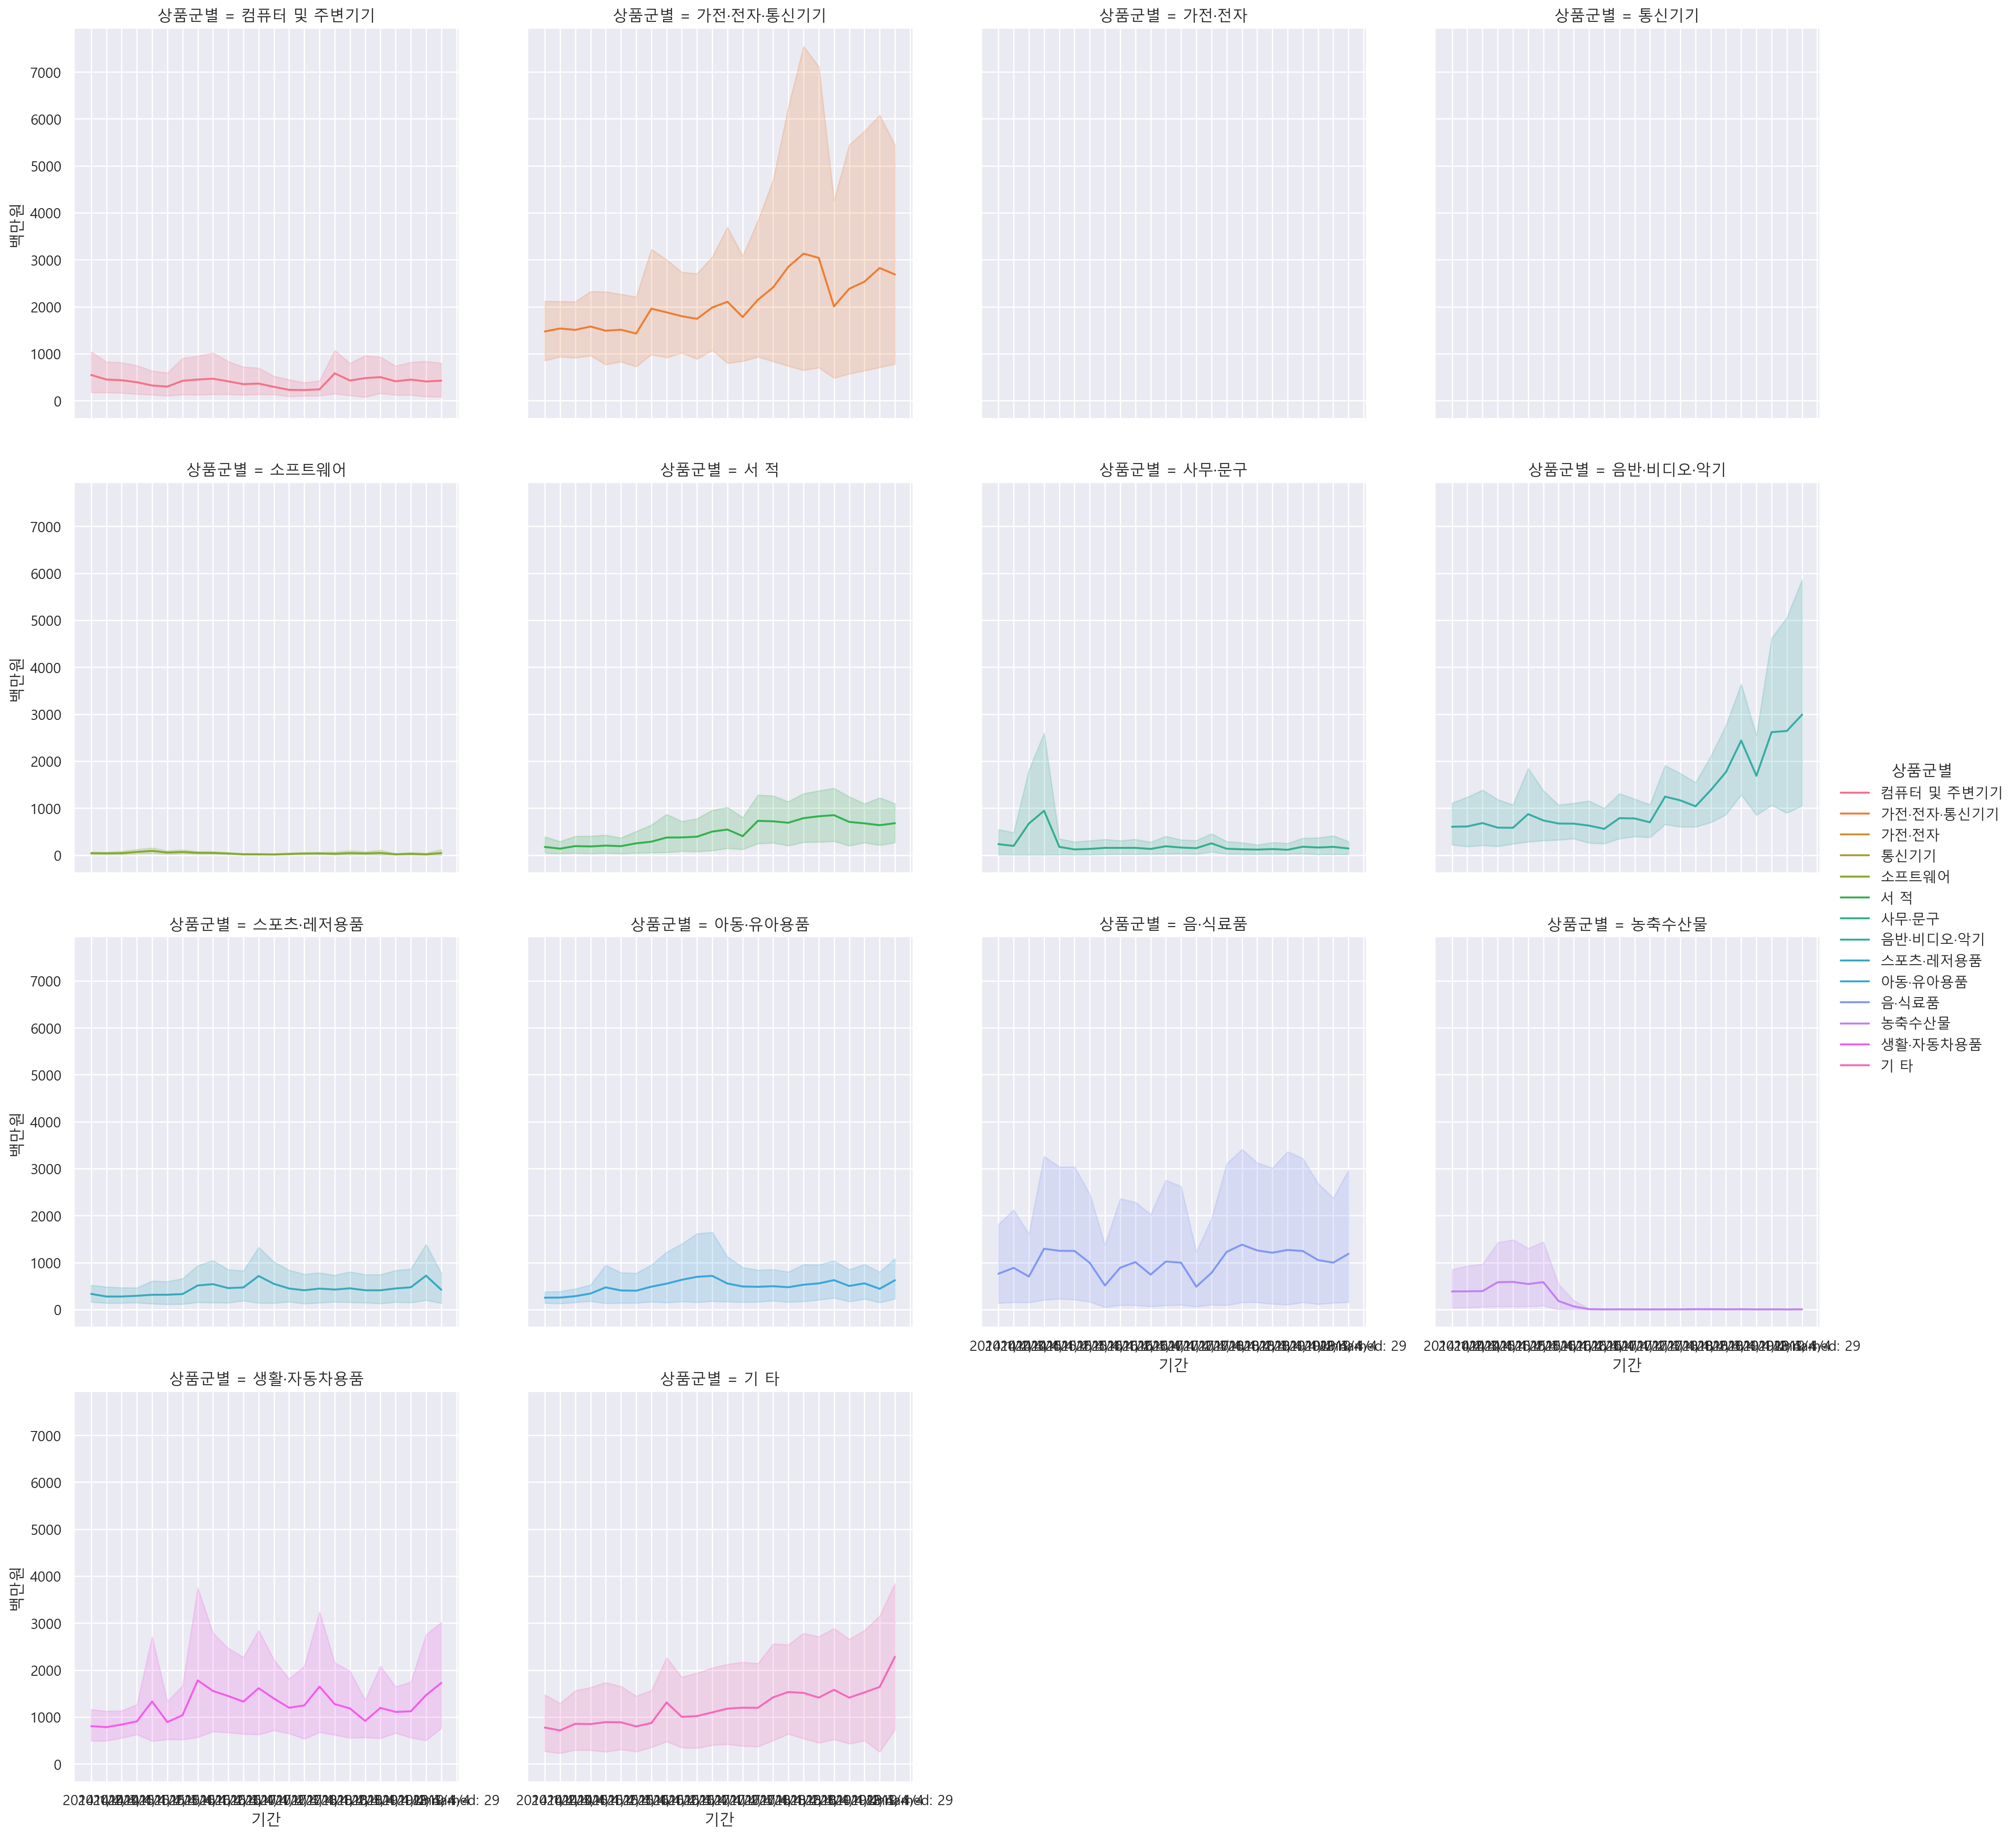

In [456]:
# 상품군별이 화장품이 아닌 데이터만 다시 그리기 
sns.relplot(data=df_sub, x="기간", y="백만원", hue="상품군별", 
            kind="line", col="상품군별", col_wrap=4)
# 기간->연도

### 6.2 화장품의 온라인쇼핑 해외직접판매액

In [396]:
# 상품군별이 화장품인 데이터만 가져오기
# copy.() : 원본 데이터를 복사하여 사용하여 원본 데이터에 영향을 주지 x
df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

<Axes: xlabel='기간', ylabel='백만원'>

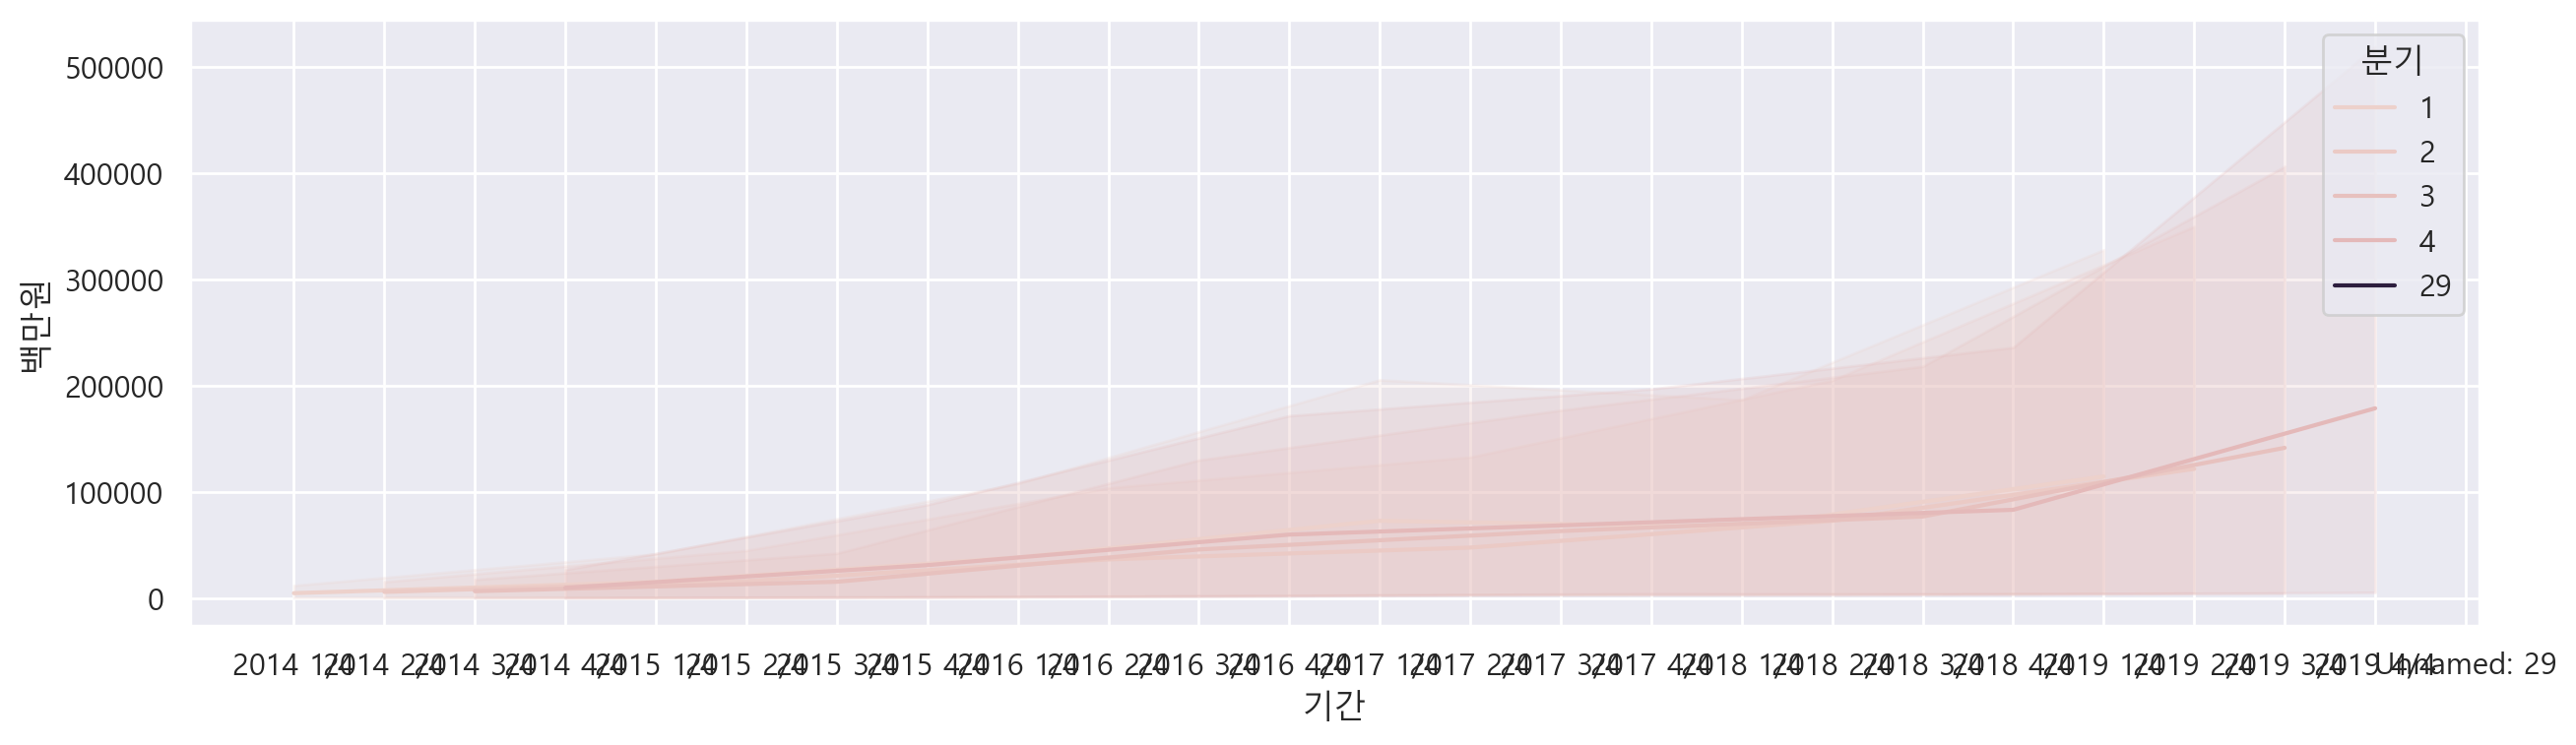

In [400]:
# 연도별 화장품 판매액 시각화 - lineplot
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="분기")
# 기간->연도

<Axes: xlabel='기간', ylabel='백만원'>

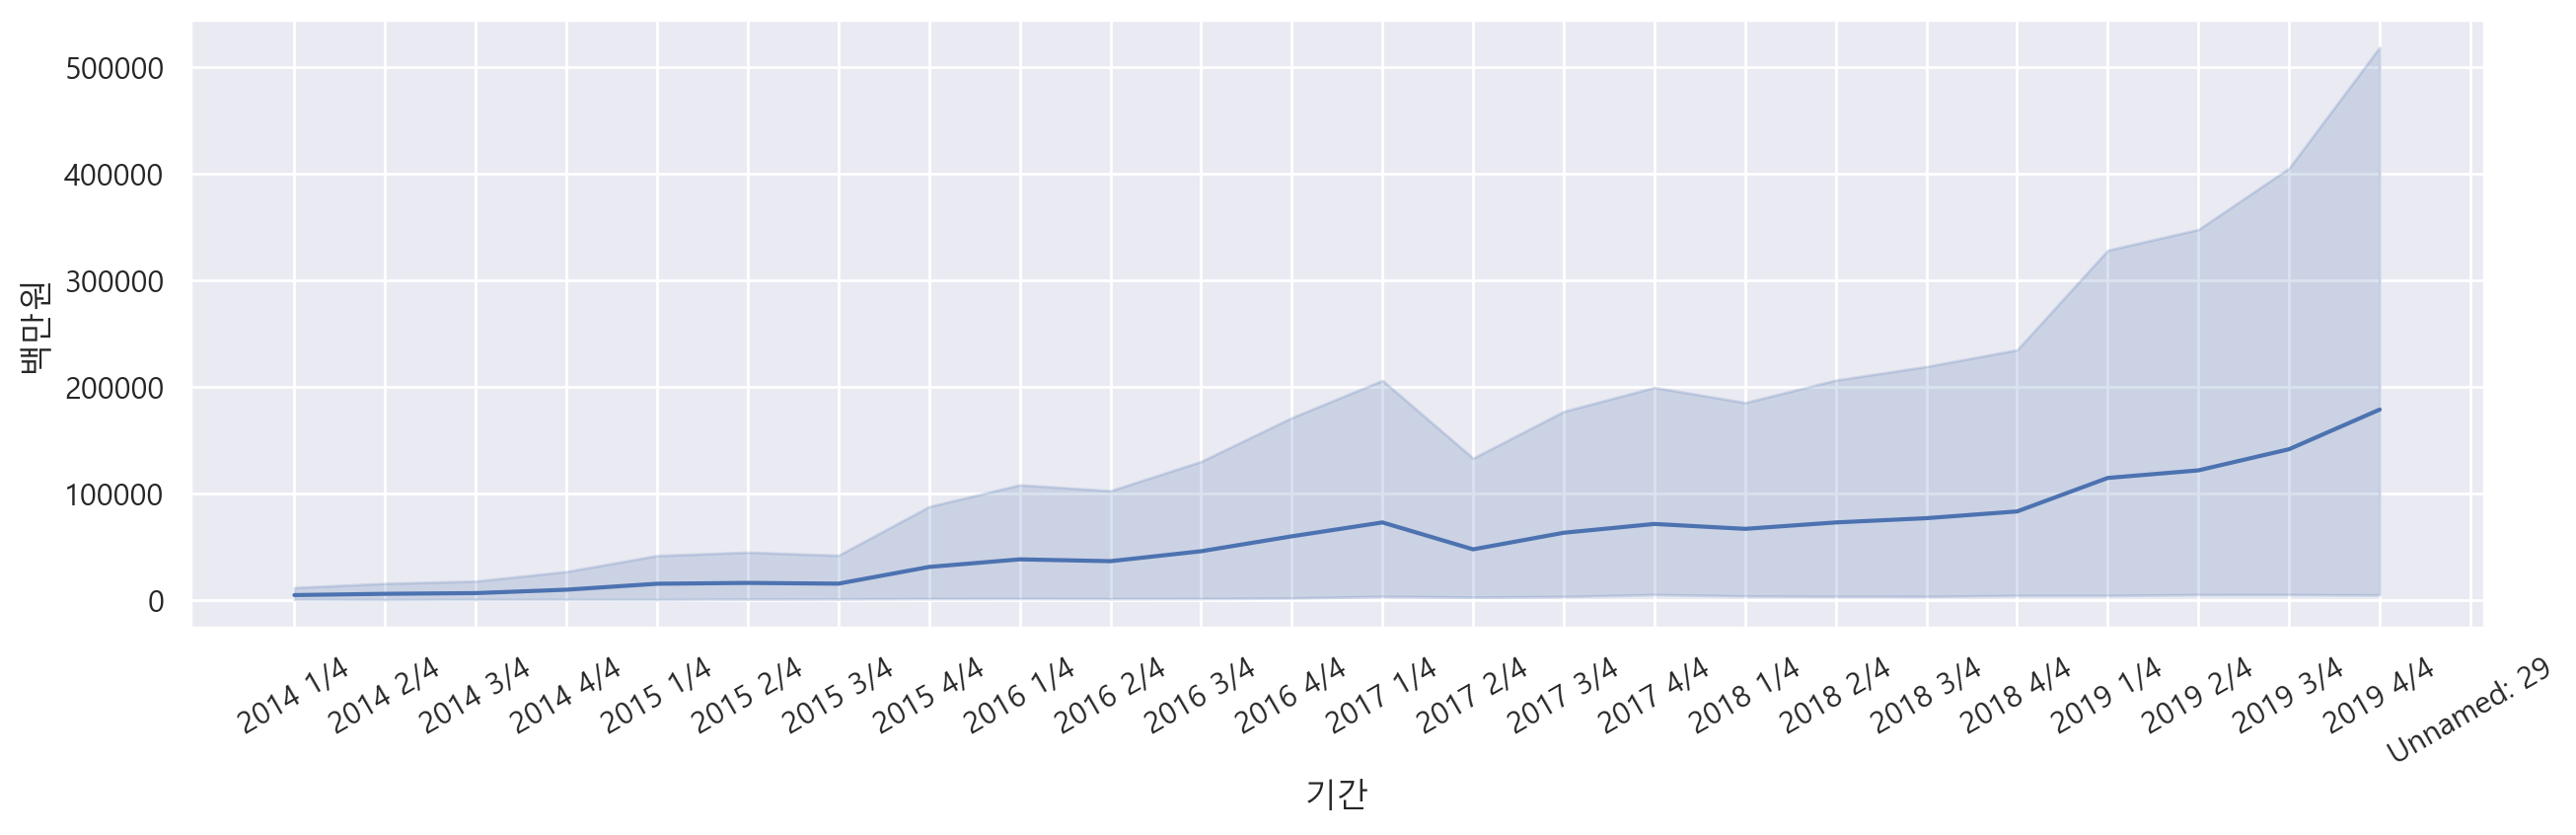

In [402]:
# 기간별 화장품 판매액 시각화
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)   # 글자 기울이기
sns.(data=df_cosmetic, x="기간", y="백만원")

<Axes: xlabel='기간', ylabel='백만원'>

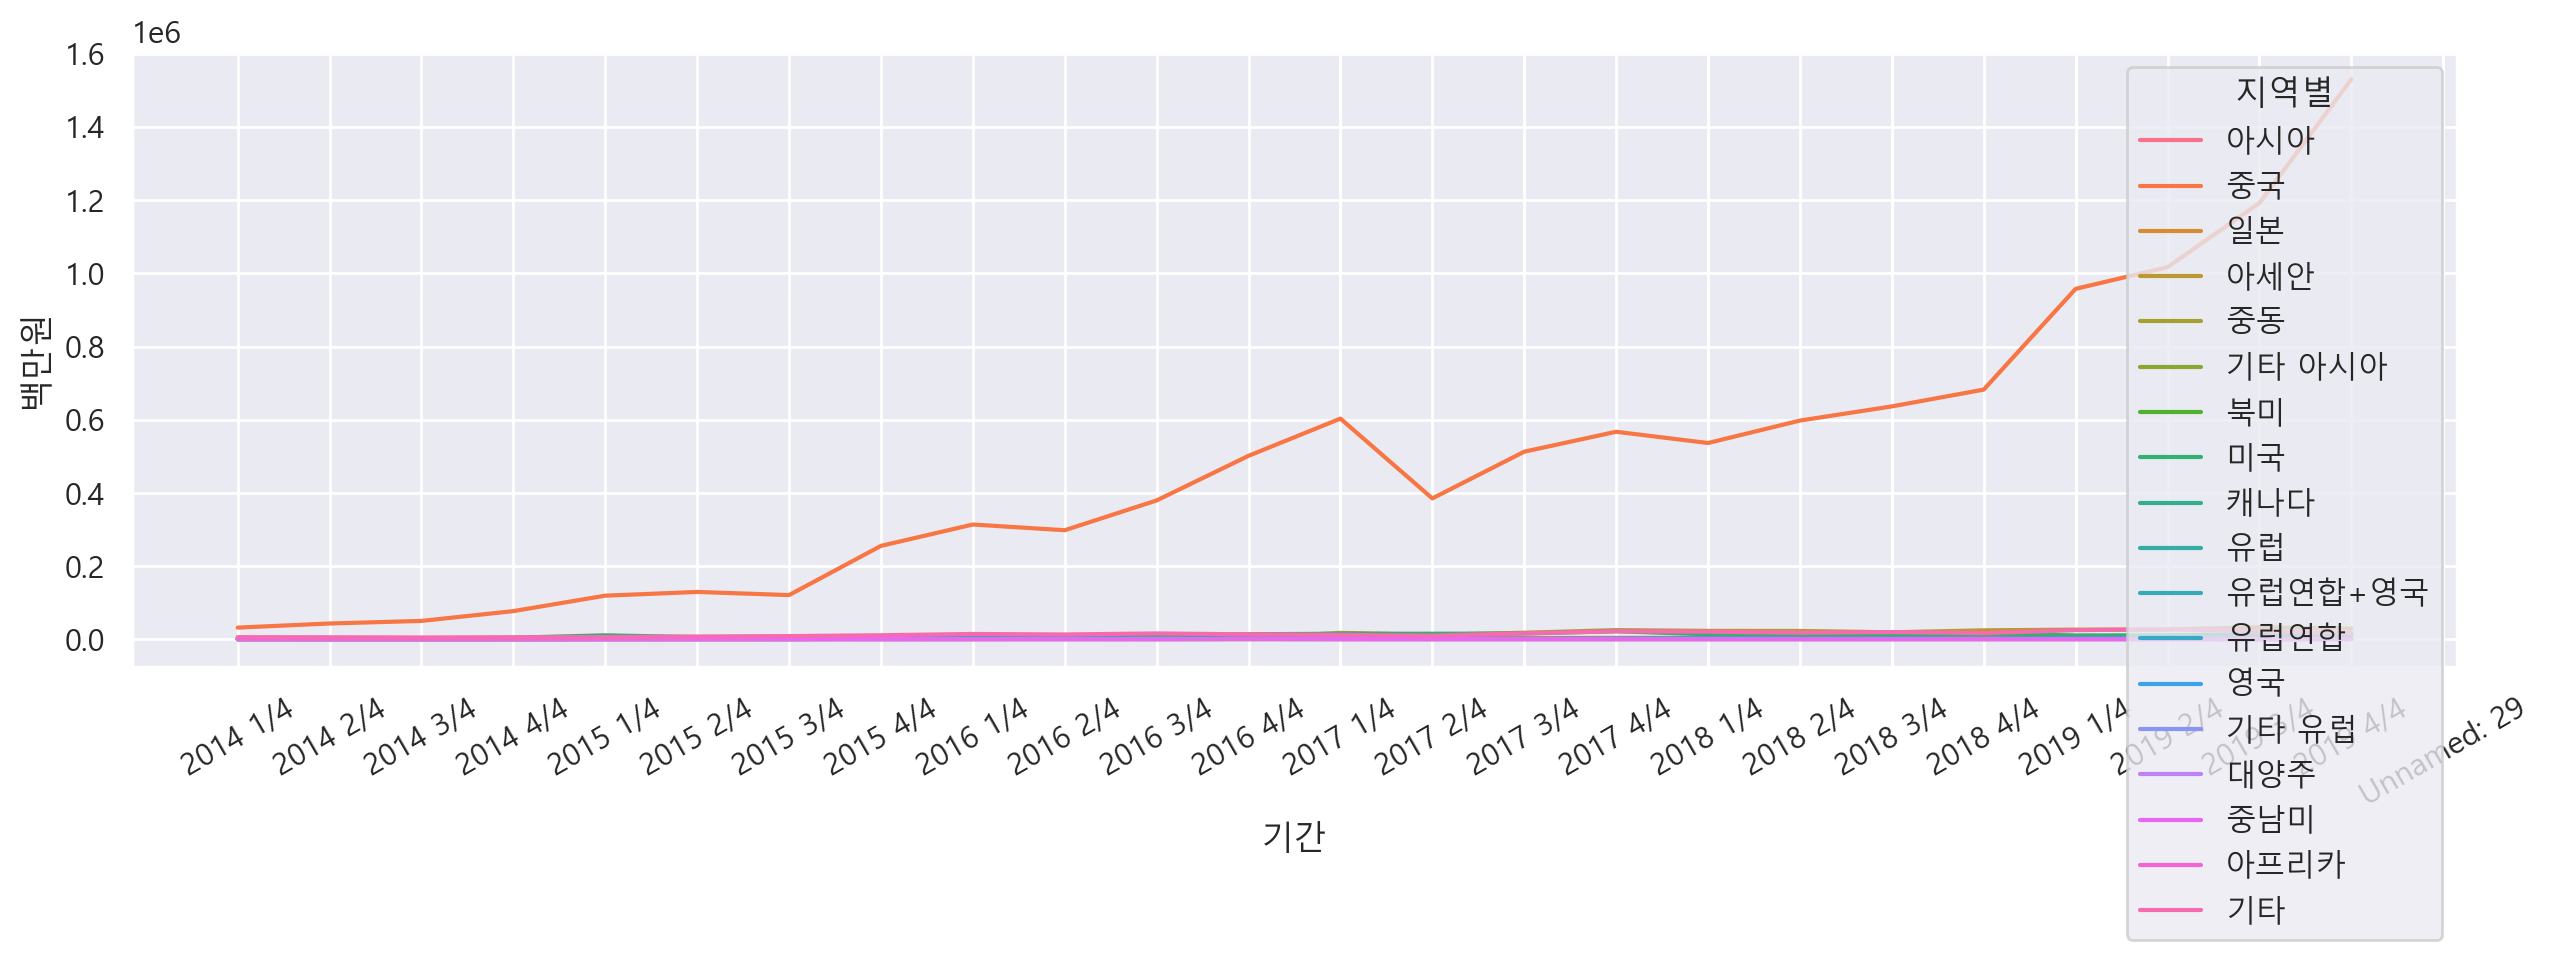

In [404]:
# 기간별 화장품 판매액 시각화 - "지역별" 다른 색상 표시
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)   # 글자 기울이기
sns.(data=df_cosmetic, x="기간", y="백만원", hue="지역별")

<Axes: xlabel='기간', ylabel='백만원'>

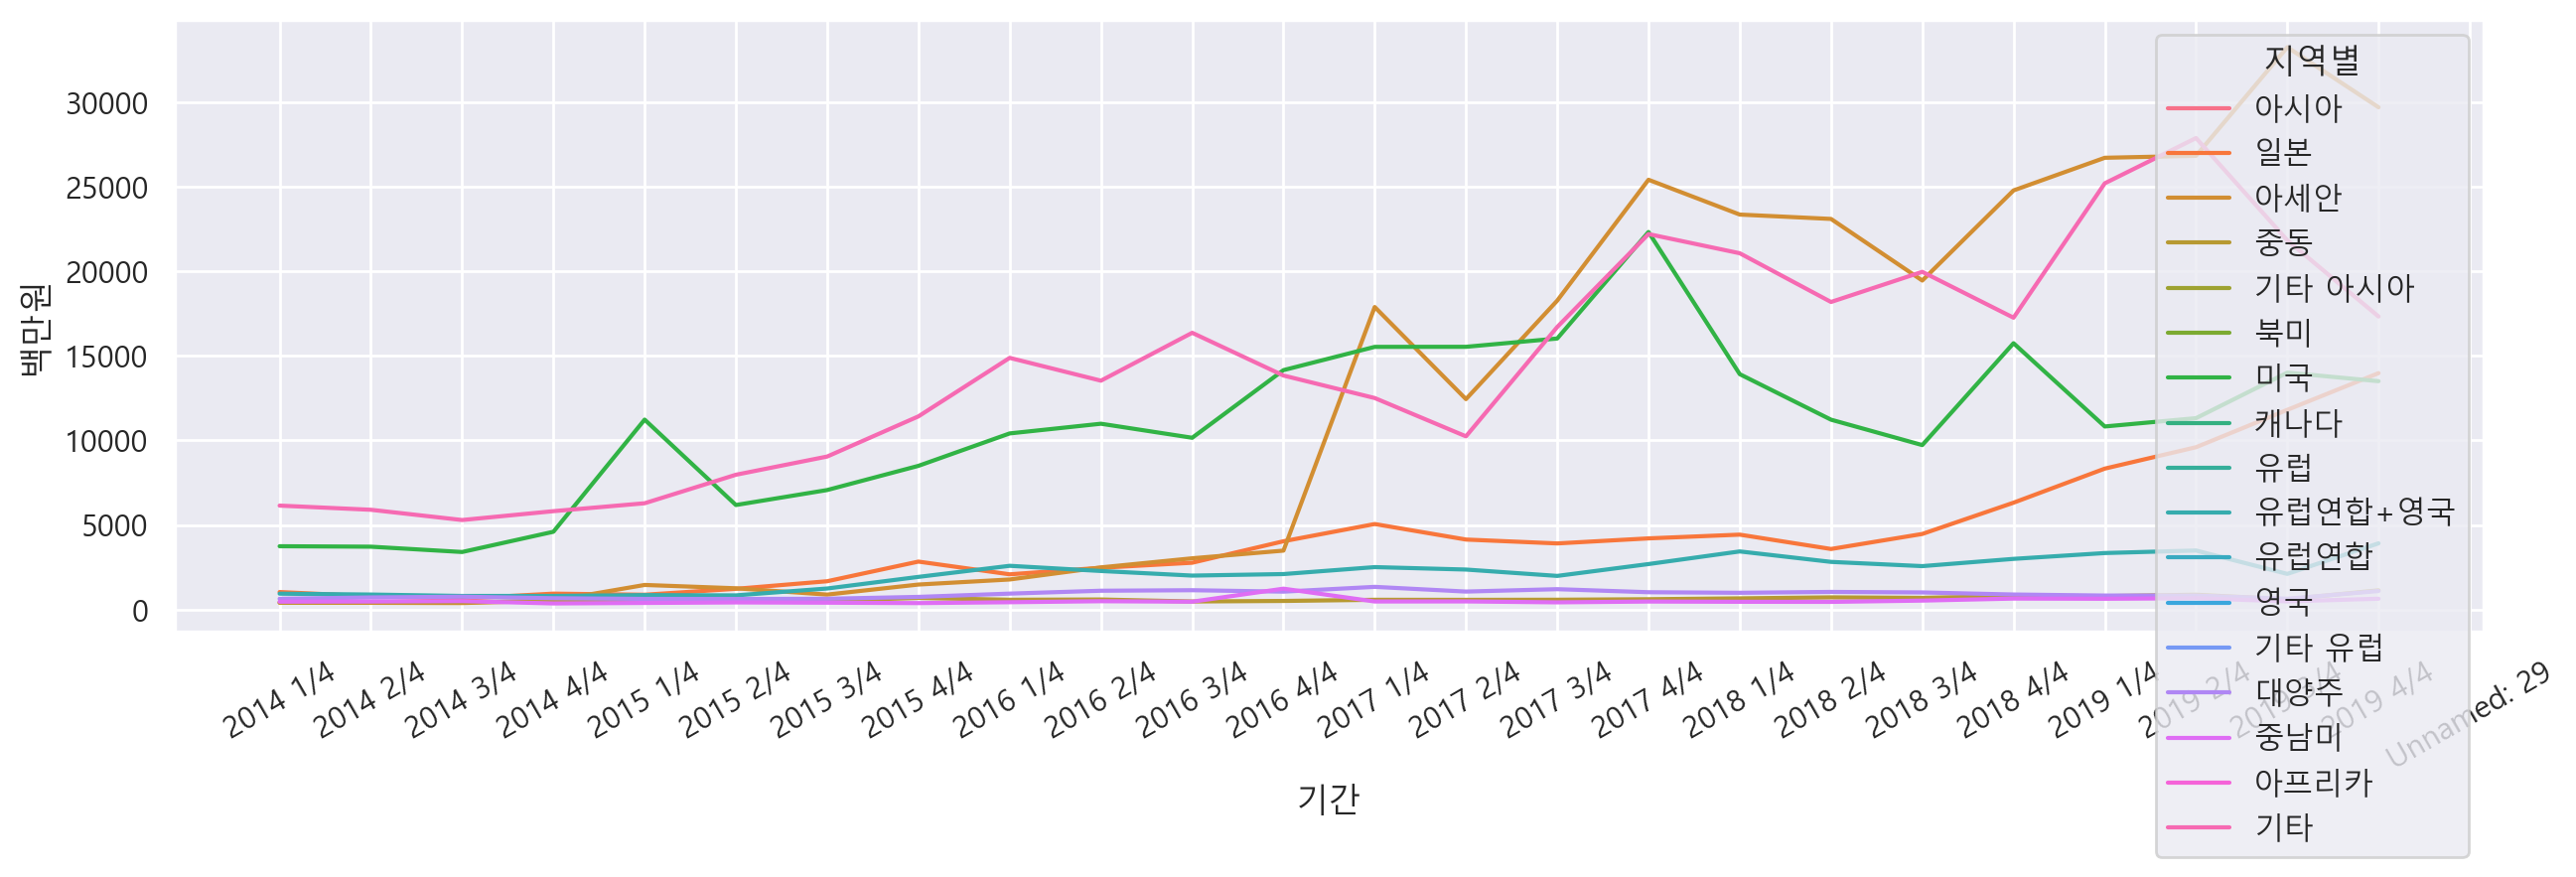

In [410]:
# 기간별 화장품 판매액 시각화 - 가장 많은 값인 "중국" 제외하고 다시 그리기
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)   # 글자 기울이기
sns.(data=df_cosmetic[df_cosmetic["지역별"] != "중국"], x="기간", y="백만원", hue="지역별")

<Axes: xlabel='기간', ylabel='백만원'>

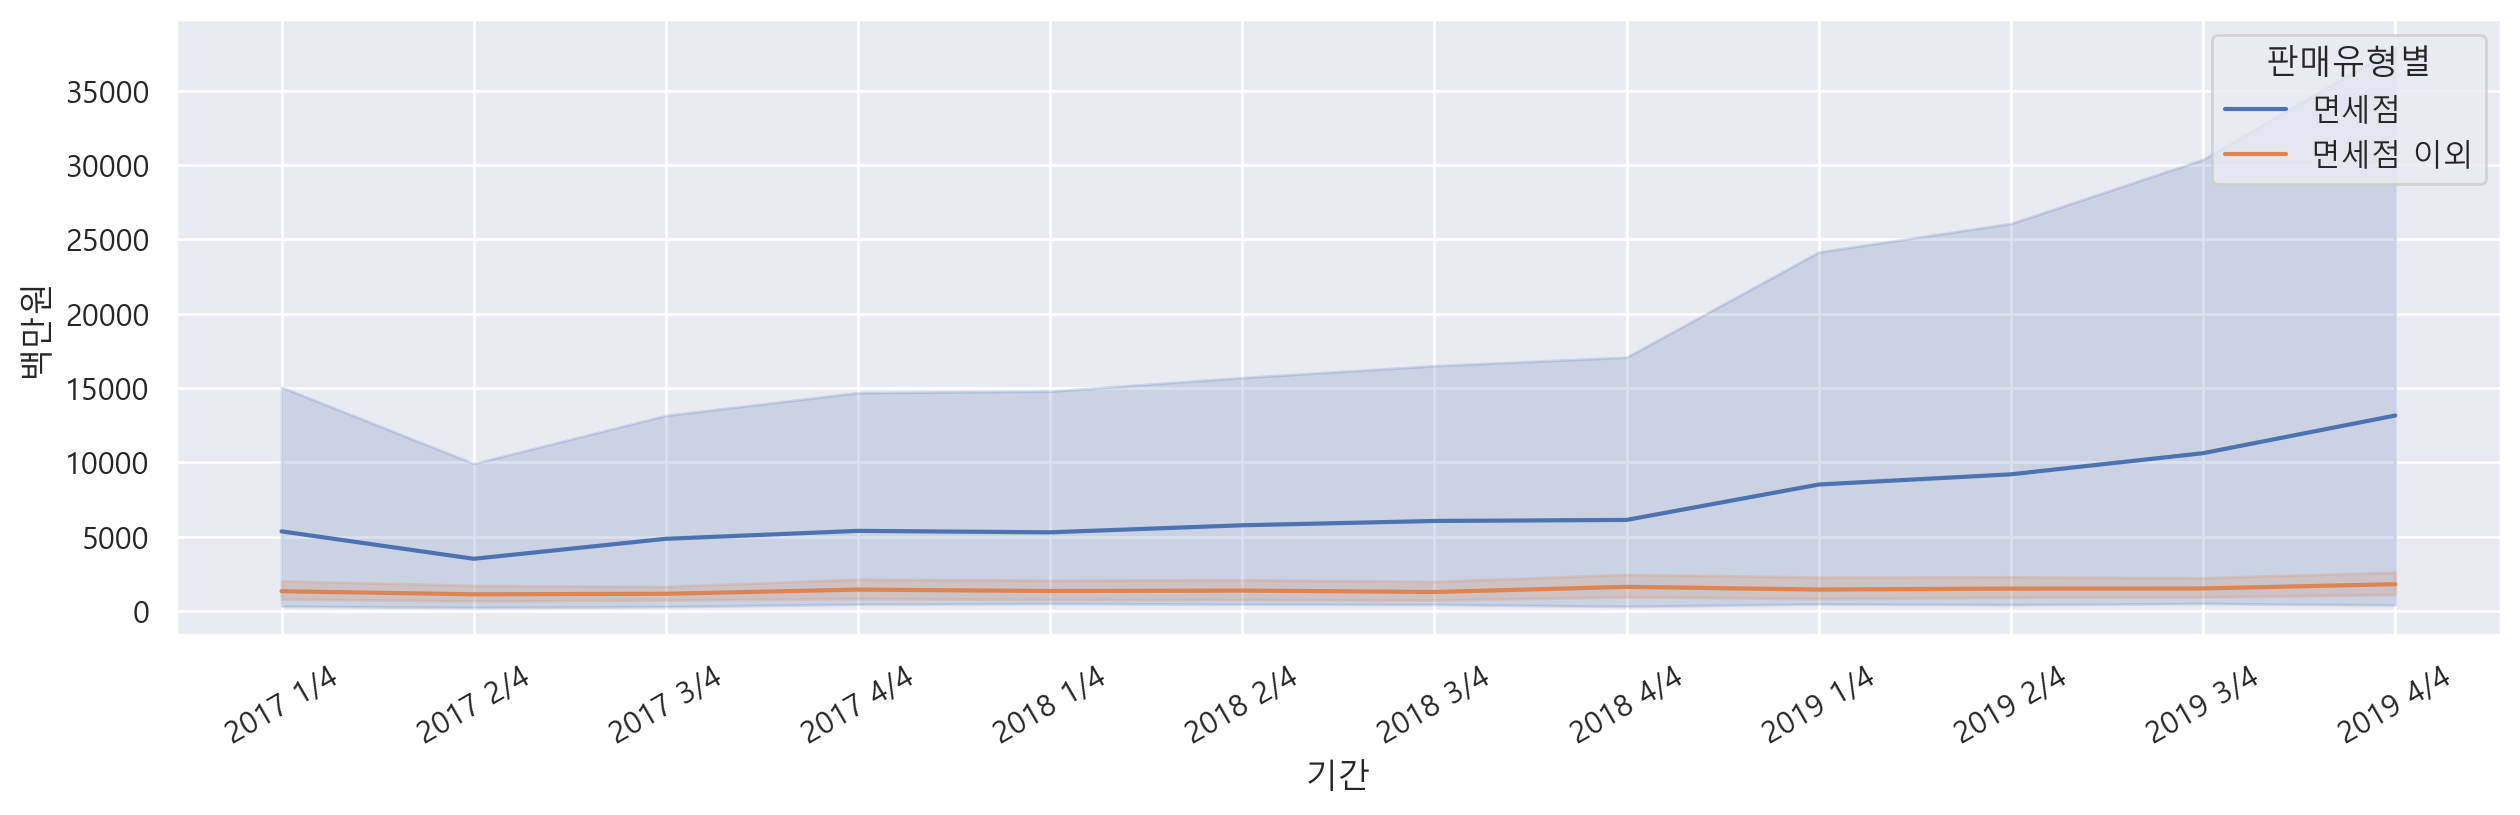

In [418]:
# 기간별 화장품 판매액 시각화 - 판매유형별 다른 색상으로 표시
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
df_sub = df[df["판매유형별"] != "계"].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별")

<Axes: xlabel='기간', ylabel='백만원'>

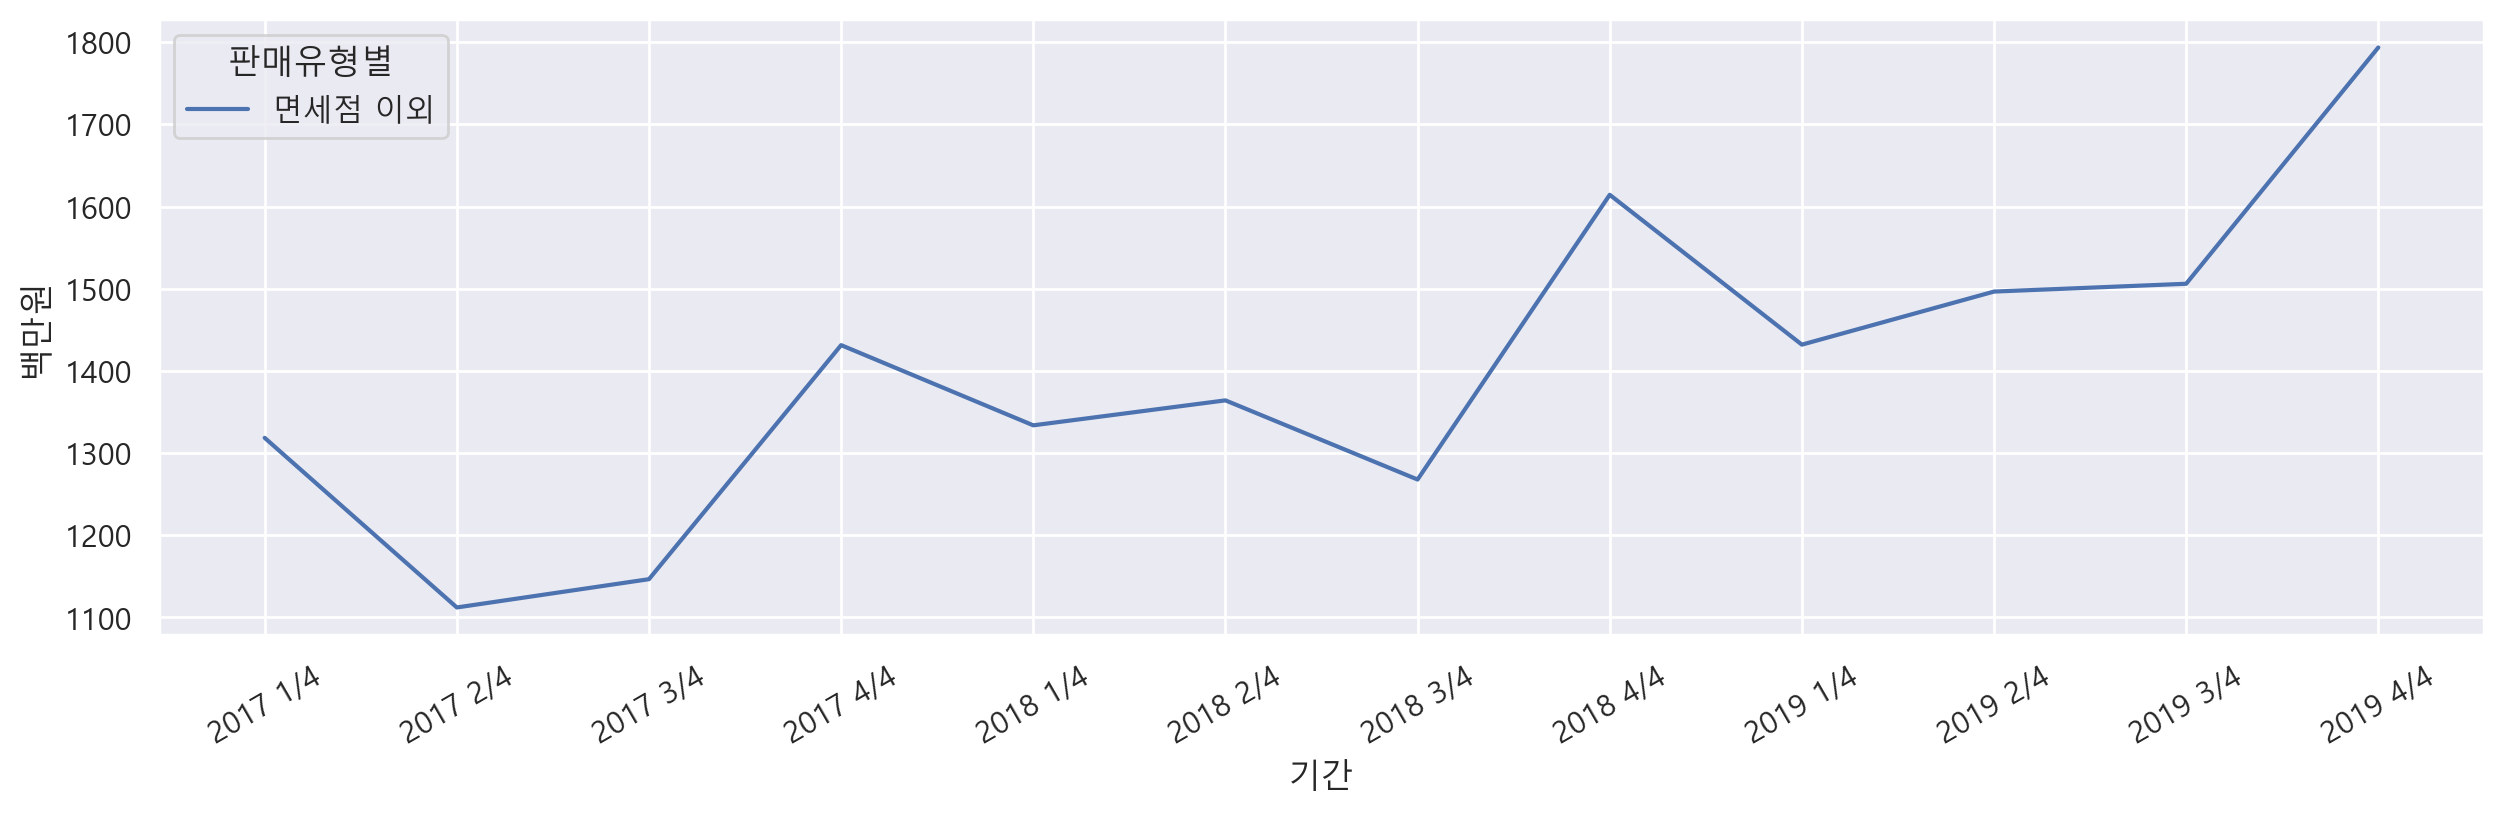

In [422]:
# 기간별 화장품 판매액 시각화 - 면세점 이외 데이터만 출력
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별", errorbar=None)

### 6.3 의류 및 패션 관련 상품 온라인쇼핑 해외직접판매액

In [459]:
# "상품군별"이 "의류 및 패션 관련 상품"인 의류 데이터 가져오기
df_fashion = df[(df["상품군별"] == "의류 및 패션 관련 상품") & (df["판매유형별"] == "계")].copy()
df_fashion.head()

지역별           상품군별 판매유형별            항목   단위        기간      백만원  분기
78   아시아  의류 및 패션 관련 상품     계  해외직접판매액[백만원]  백만원  2014 1/4      NaN   1
129   중국  의류 및 패션 관련 상품     계  해외직접판매액[백만원]  백만원  2014 1/4  12206.0   1
180   일본  의류 및 패션 관련 상품     계  해외직접판매액[백만원]  백만원  2014 1/4  13534.0   1
231  아세안  의류 및 패션 관련 상품     계  해외직접판매액[백만원]  백만원  2014 1/4   3473.0   1
282   중동  의류 및 패션 관련 상품     계  해외직접판매액[백만원]  백만원  2014 1/4    342.0   1

<Axes: xlabel='기간', ylabel='백만원'>

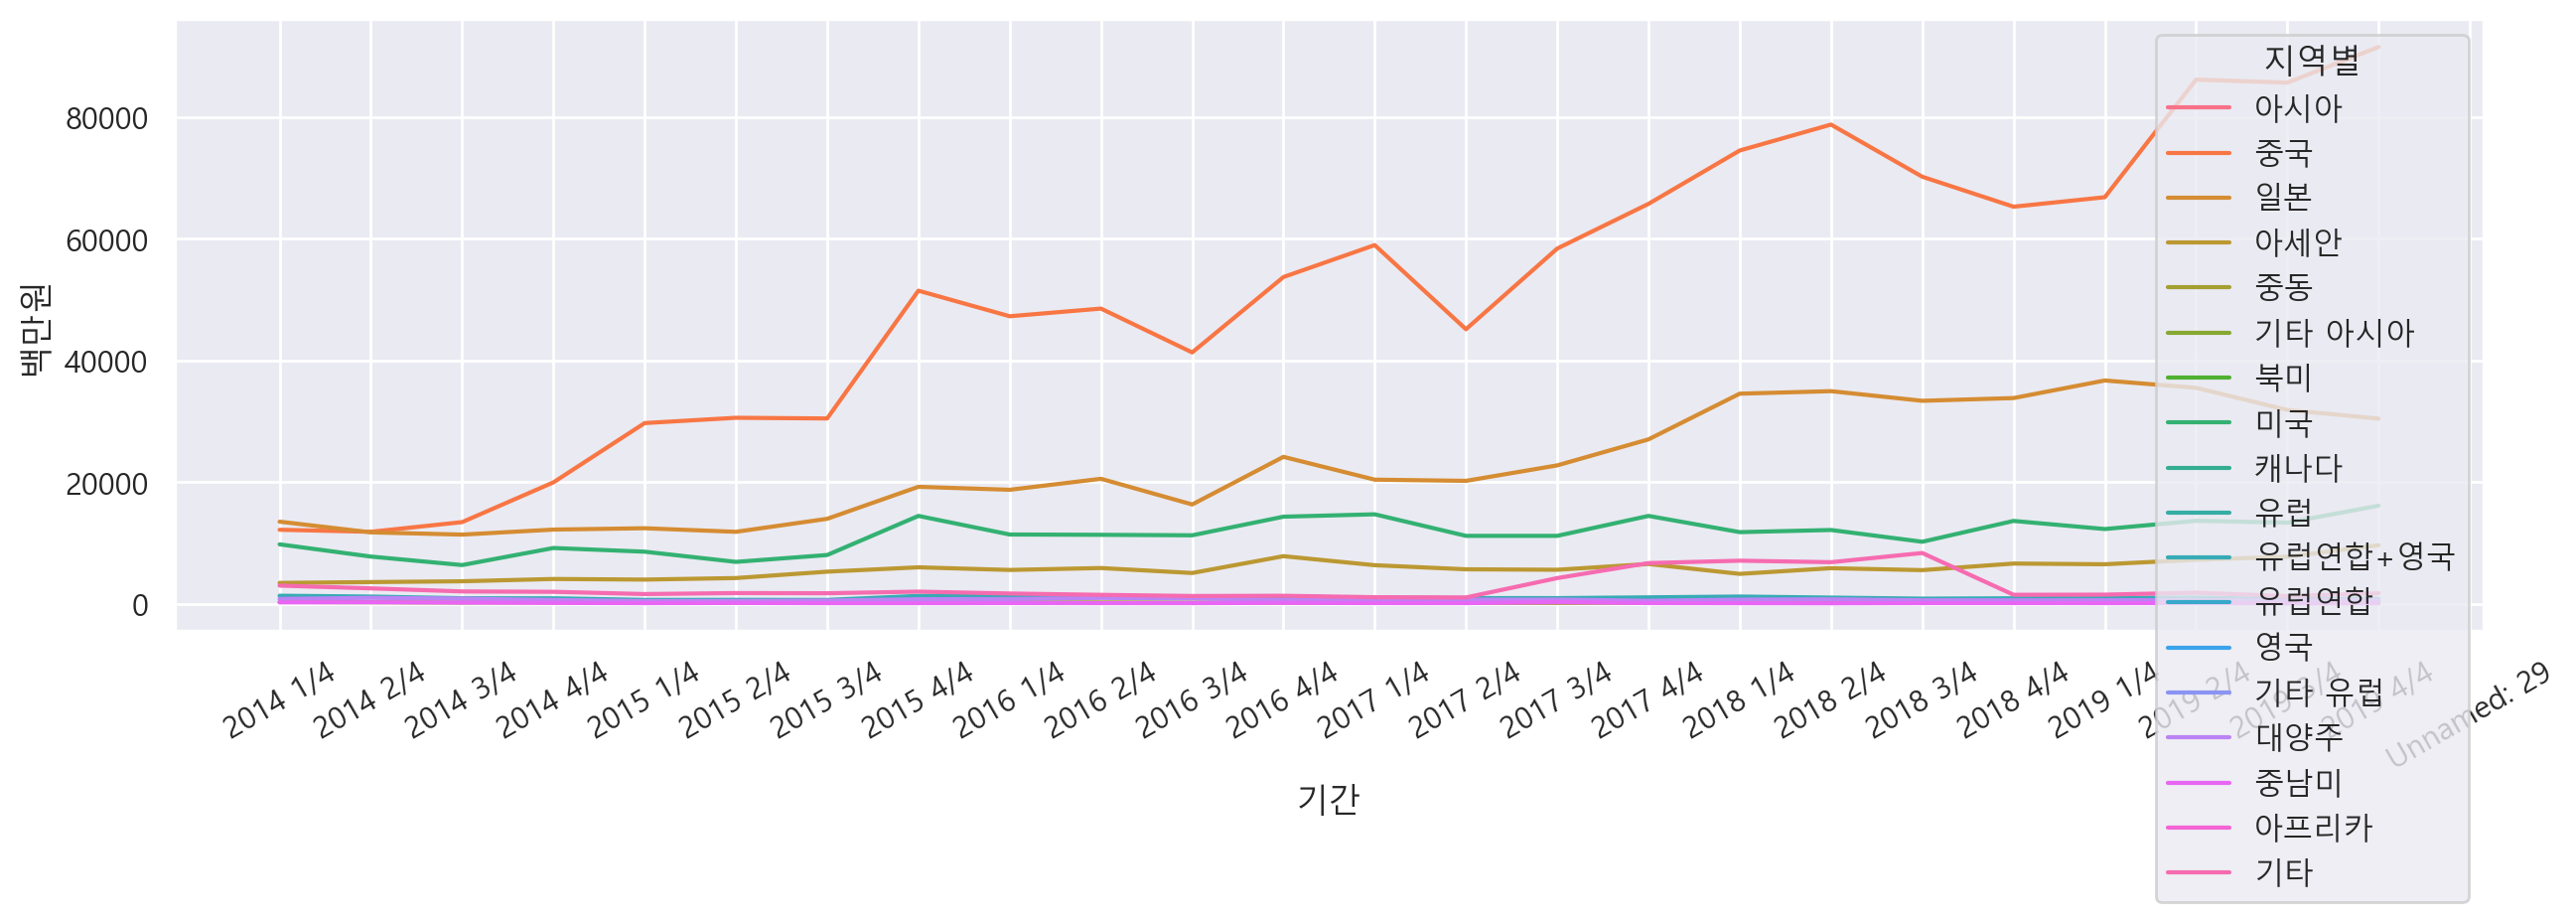

In [461]:
# 기간별 "의류" 판매금액 데이터 시각화 - 지역별 다른 색상 표시
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="지역별")

<Axes: xlabel='기간', ylabel='백만원'>

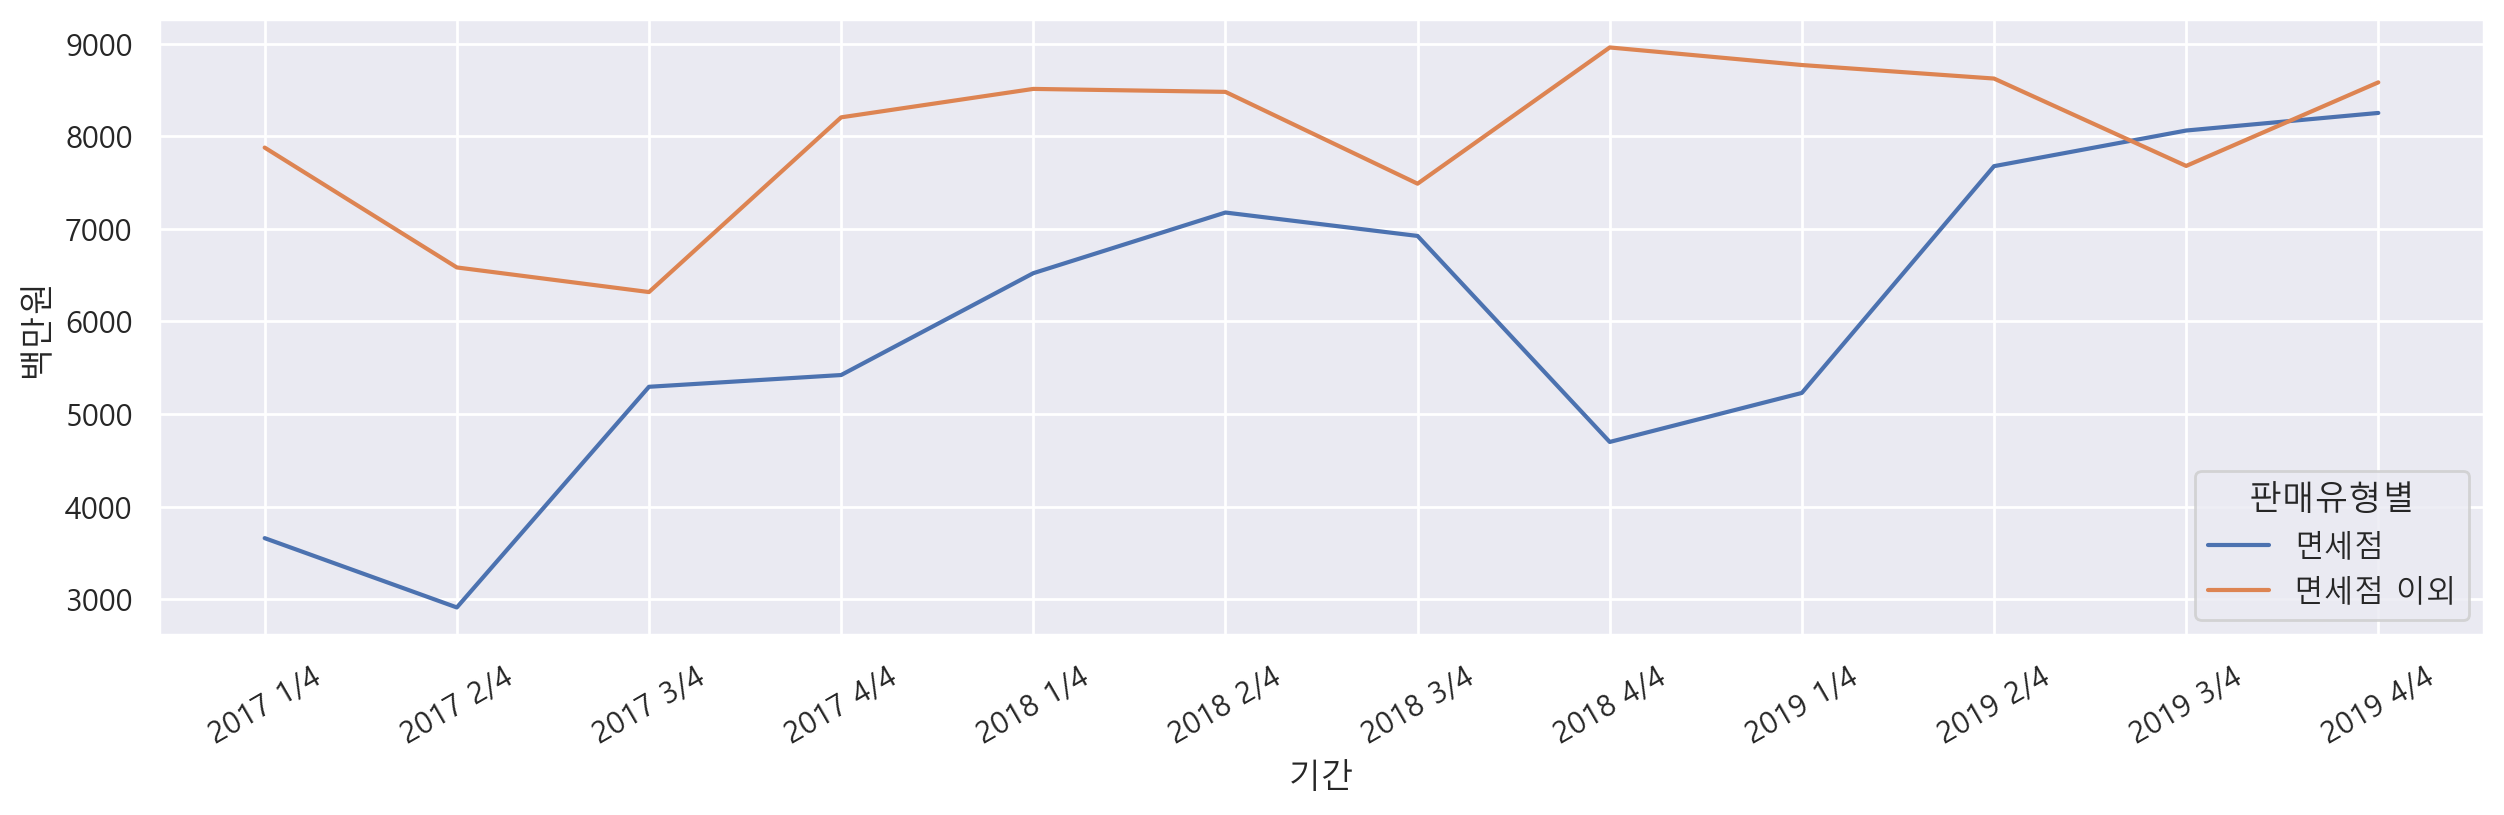

In [469]:
# 기간별 "의류" 판매금액 데이터 시각화 - 판매유형별 다른 색상 표시
# "계" 제거 시 2014~2016년 데이터 조회가 안 되기 때문에 위에는 "계" 데이터만 출력
# "계" 제거하여 데이터 출력
df_fashion2 = df[(df["상품군별"] == "의류 및 패션 관련 상품") & (df["판매유형별"] != "계")].copy()

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", errorbar=None)

### 6.4 데이터 집계하기

In [474]:
df_fashion["판매유형별"].value_counts()

판매유형별
계    450
Name: count, dtype: int64

In [476]:
df_fashion.head(2)

지역별           상품군별 판매유형별            항목   단위        기간      백만원  분기
78   아시아  의류 및 패션 관련 상품     계  해외직접판매액[백만원]  백만원  2014 1/4      NaN   1
129   중국  의류 및 패션 관련 상품     계  해외직접판매액[백만원]  백만원  2014 1/4  12206.0   1

In [480]:
# "지역별", "연도별" 합계 금액 출력
result = df_fashion.pivot_table(index="지역별", columns="기간", values="백만원", aggfunc="sum")
result
# 기간-> 연도

기간       2014 1/4  2014 2/4  2014 3/4  2014 4/4  2015 1/4  2015 2/4  2015 3/4  \
지역별                                                                             
기타         3031.0    2573.0    2070.0    2009.0    1640.0    1800.0    1772.0   
기타 아시아        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
기타 유럽         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
대양주         837.0    1014.0     884.0     657.0     487.0     509.0     571.0   
미국         9810.0    7801.0    6404.0    9208.0    8602.0    6927.0    8055.0   
북미            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
아세안        3473.0    3606.0    3741.0    4116.0    4018.0    4269.0    5318.0   
아시아           0.0       0.0       0.0       0.0       0.0       0.0       0.0   
아프리카          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
영국            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
유럽            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
유럽연합          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
유럽연합+영국    1364.0    1228.0     952.0     941.0     676.0     687.0     674.0   
일본        13534.0   11782.0   11408.0   12236.0   12456.0   11868.0   14005.0   
중국        12206.0   11874.0   13461.0   19990.0   29737.0   30608.0   30498.0   
중남미         271.0     290.0     231.0     183.0     149.0     177.0     145.0   
중동          342.0     296.0     252.0     282.0     230.0     244.0     222.0   
캐나다           0.0       0.0       0.0       0.0       0.0       0.0       0.0   

기간       2015 4/4  2016 1/4  2016 2/4  ...  2017 4/4  2018 1/4  2018 2/4  \
지역별                                    ...                                 
기타         2036.0    1727.0    1512.0  ...    6728.0    7122.0    6874.0   
기타 아시아        0.0       0.0       0.0  ...       0.0       0.0       0.0   
기타 유럽         0.0       0.0       0.0  ...       0.0       0.0       0.0   
대양주         782.0     818.0    1004.0  ...     536.0     722.0     776.0   
미국        14482.0   11427.0   11375.0  ...   14483.0   11815.0   12169.0   
북미            0.0       0.0       0.0  ...       0.0       0.0       0.0   
아세안        6034.0    5600.0    5914.0  ...    6579.0    4955.0    5889.0   
아시아           0.0       0.0       0.0  ...       0.0       0.0       0.0   
아프리카          0.0       0.0       0.0  ...       0.0       0.0       0.0   
영국            0.0       0.0       0.0  ...       0.0       0.0       0.0   
유럽            0.0       0.0       0.0  ...       0.0       0.0       0.0   
유럽연합          0.0       0.0       0.0  ...       0.0       0.0       0.0   
유럽연합+영국    1337.0    1319.0    1289.0  ...    1098.0    1230.0    1056.0   
일본        19265.0   18776.0   20580.0  ...   27061.0   34571.0   34982.0   
중국        51496.0   47293.0   48554.0  ...   65763.0   74535.0   78794.0   
중남미         145.0     160.0     151.0  ...     158.0     139.0     123.0   
중동          322.0     265.0     257.0  ...     216.0     198.0     232.0   
캐나다           0.0       0.0       0.0  ...       0.0       0.0       0.0   

기간       2018 3/4  2018 4/4  2019 1/4  2019 2/4  2019 3/4  2019 4/4  \
지역별                                                                   
기타         8385.0    1520.0    1542.0    1860.0    1299.0    1774.0   
기타 아시아        0.0       0.0       0.0       0.0       0.0       0.0   
기타 유럽         0.0       0.0       0.0       0.0       0.0       0.0   
대양주         619.0     608.0     627.0     633.0     578.0     651.0   
미국        10233.0   13658.0   12324.0   13683.0   13368.0   16161.0   
북미            0.0       0.0       0.0       0.0       0.0       0.0   
아세안        5572.0    6652.0    6537.0    7278.0    7768.0    9664.0   
아시아           0.0       0.0       0.0       0.0       0.0       0.0   
아프리카          0.0       0.0       0.0       0.0       0.0       0.0   
영국            0.0       0.0       0.0       0.0       0.0       0.0   
유럽    

### 6.5 연산결과를 시각적으로 보기

<Axes: xlabel='기간', ylabel='지역별'>

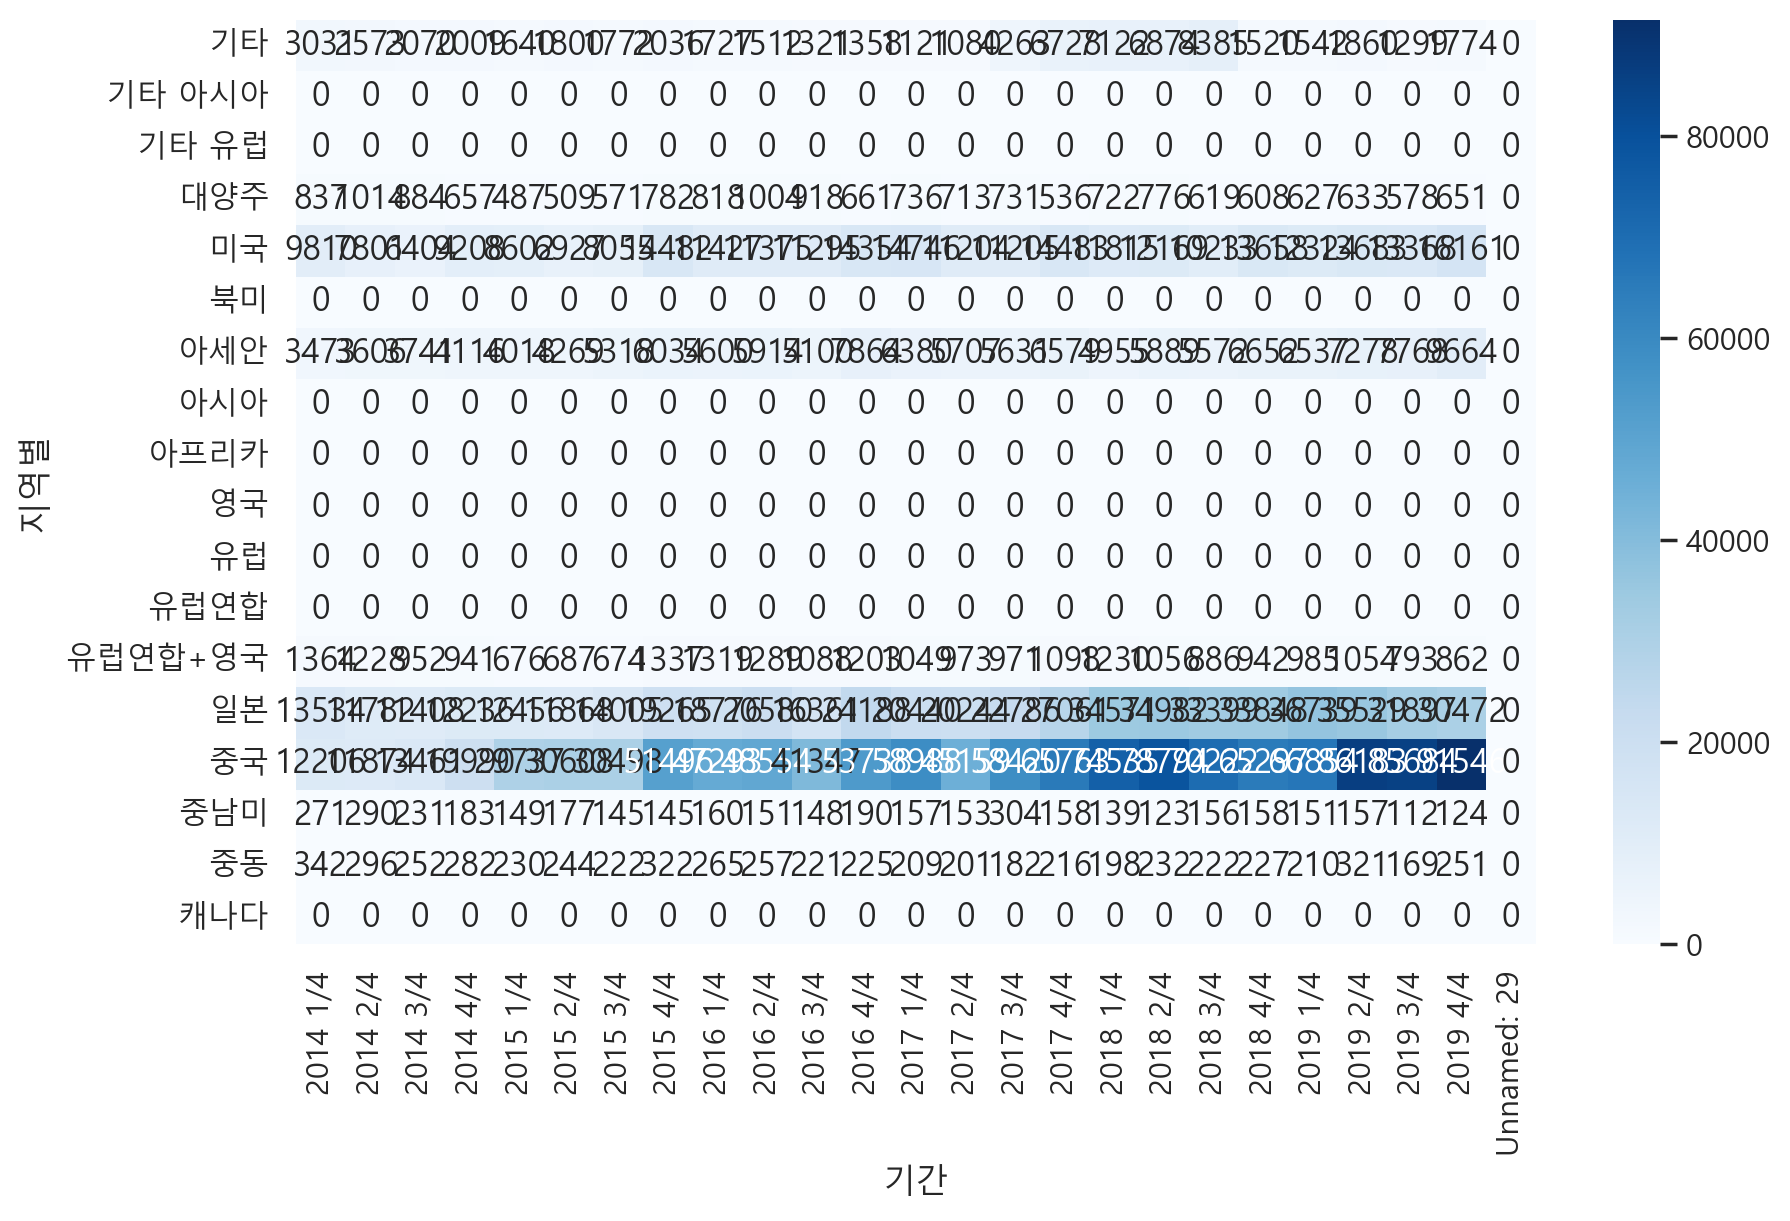

In [489]:
# 피봇테이블로 구한 결과를 시각화
# annot=True: 숫자값 표시
# fmt: 자릿수 지정
plt.figure(figsize=(10, 6))
sns.heatmap(result, cmap="Blues", annot=True, fmt=".0f")
# sns.heatmap(result, cmap="Blues_r") # 색 반전

## 7. 전체 상품군별 온라인쇼핑 해외직접판매액은 증가했을까?

<Axes: xlabel='기간', ylabel='백만원'>

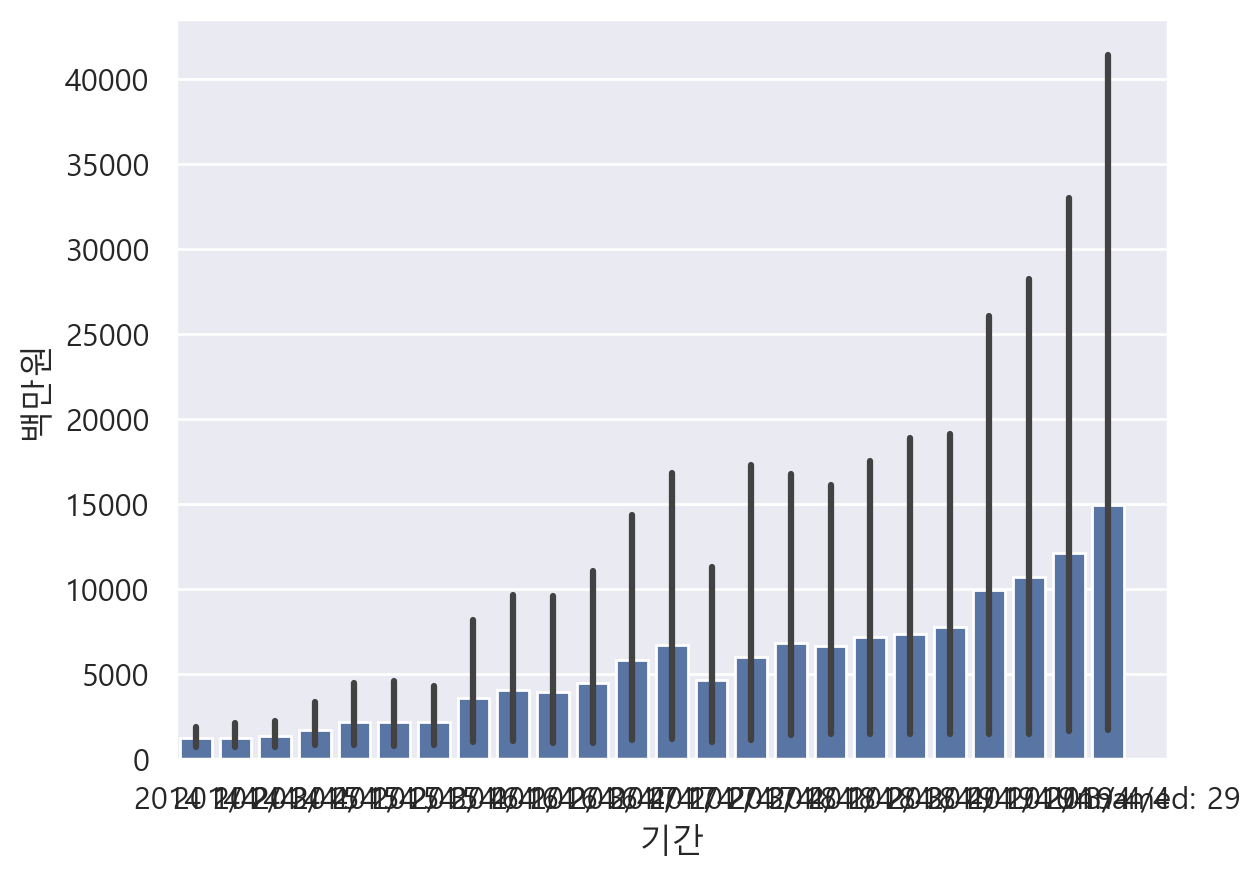

In [494]:
# 판매유형별이 "계"인 데이터 연도별 합계금액 시각화
sns.barplot(data=df_total, x="기간", y="백만원")
# 기간-> 연도

<Axes: xlabel='기간', ylabel='백만원'>

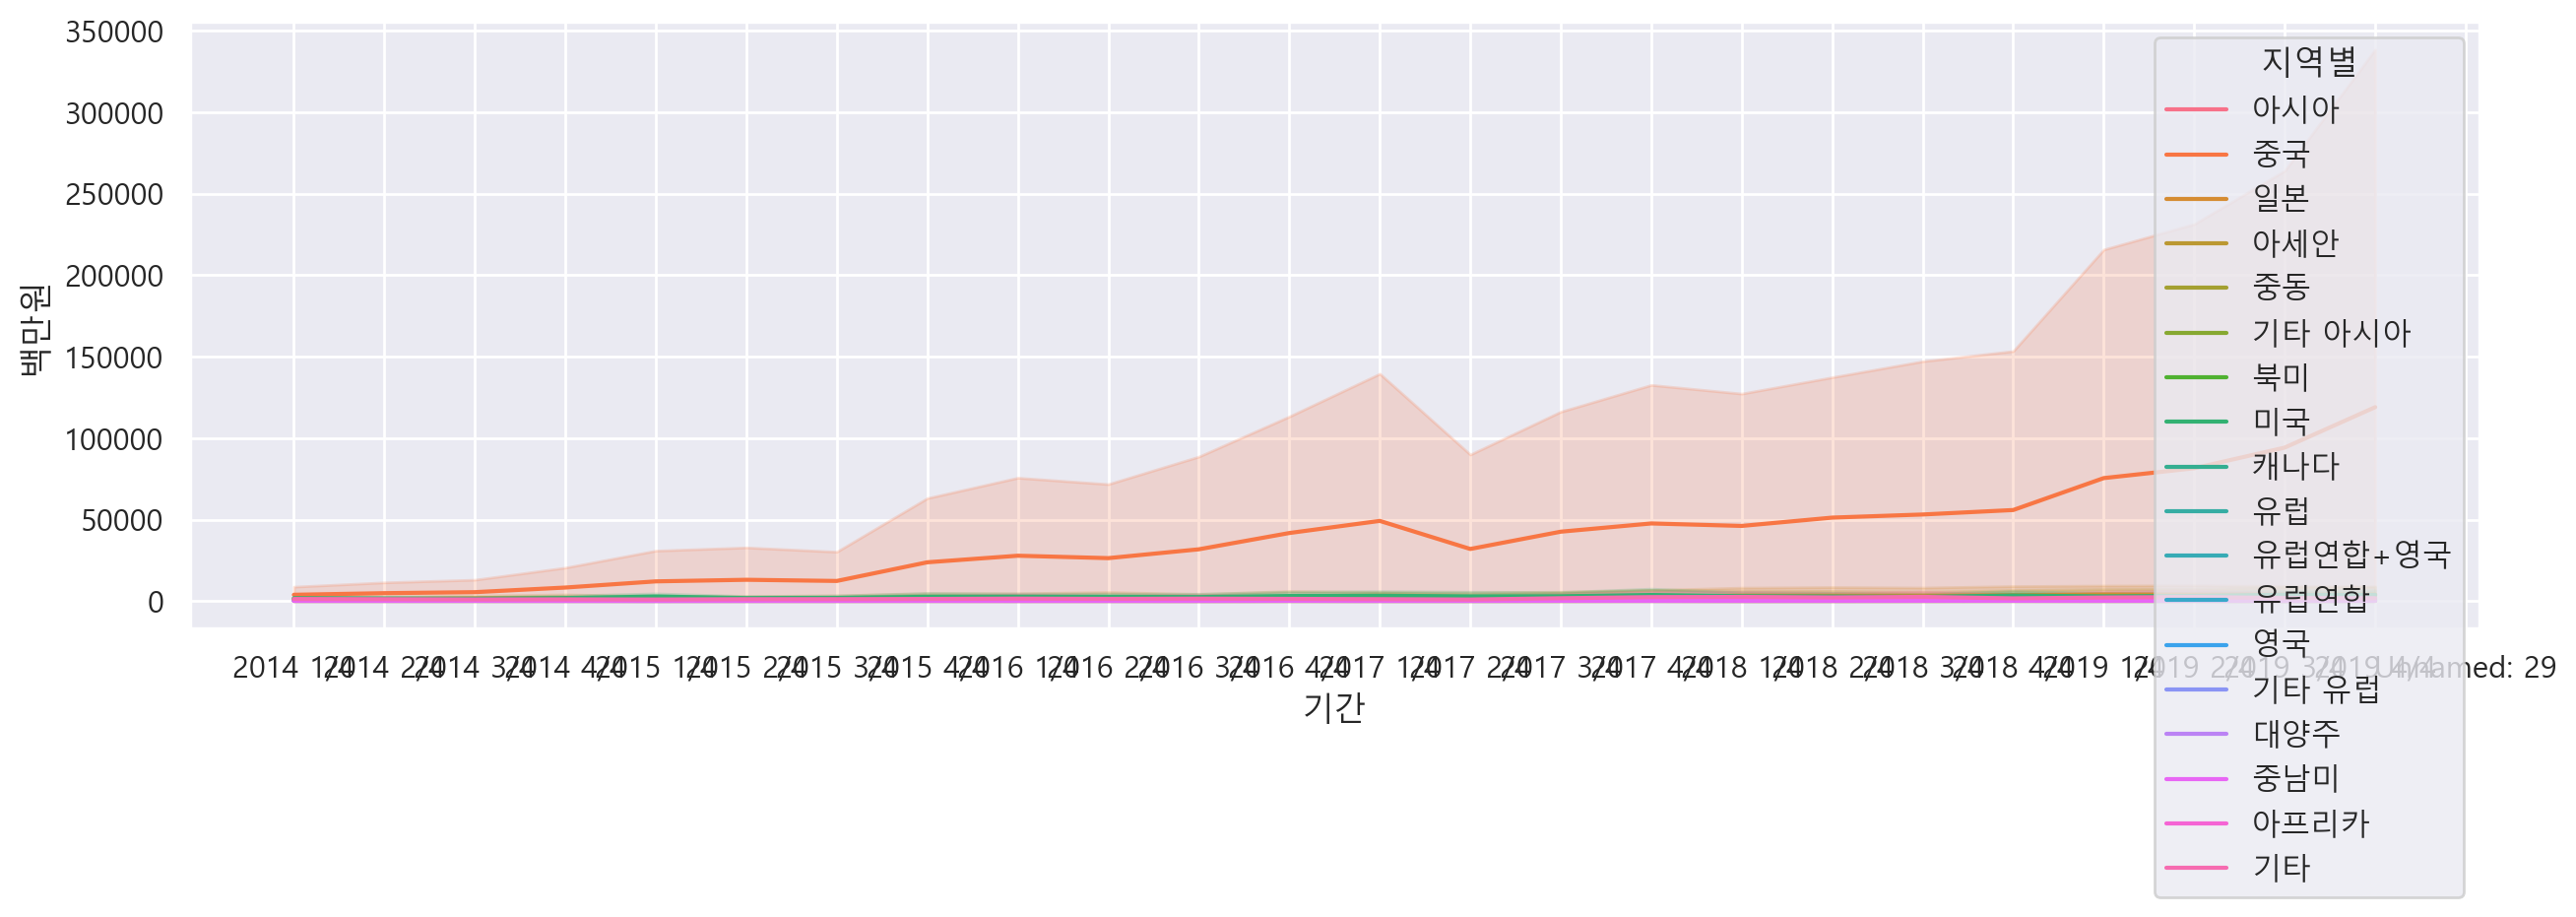

In [501]:
# "연도별" "판매합계금액" 시각화 - "지역별" 다른색상
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="기간", y="백만원", hue="지역별")
# 기간->연도

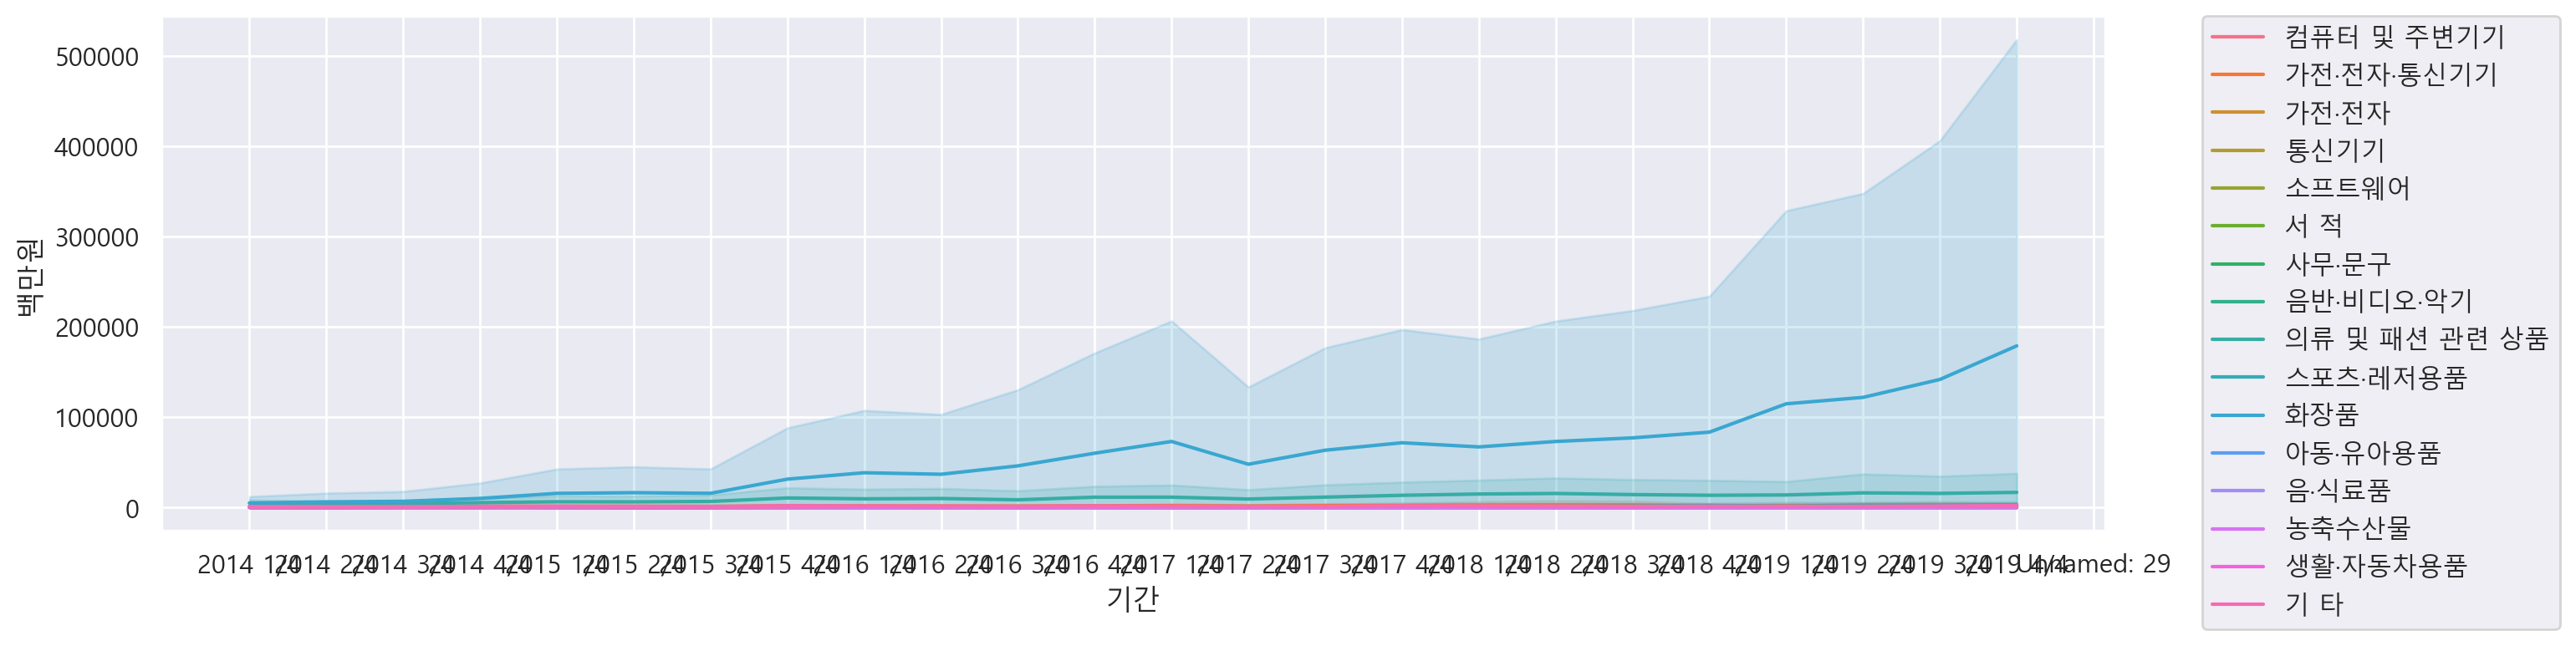

In [503]:
# "연도별" "판매합계금액" 시각화 - "상품군별" 다른색상
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="기간", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# 기간->연도